# **Understanding Key Drivers of Customer Purchasing Behavior**

---

## **Project Overview**
This project analyzes customer purchasing habits on Shopee to pinpoint the main factors that influence buying decisions. By examining trends in customer behavior, we aim to develop targeted strategies for marketing and engagement that align more closely with customer needs, ultimately boosting loyalty and driving revenue growth.

<br>

---

## **Stakeholders**

### 1. Marketing Team
- **Needs**: To identify and segment customer groups for targeted marketing, maximizing engagement through personalized promotions and campaigns.
- **Success Criteria**: Effective customer segments that lead to insights on engagement trends, conversion patterns, and customer retention across different segments.

### 2. Business Analyst Team
- **Needs**: To access actionable insights into customer behavior, including purchasing trends and segment performance, for strategic decision-making.
- **Success Criteria**:  Comprehensive reports that provide a clear understanding of purchasing behavior, customer segments, and trends, allowing for data-driven recommendations.

### 3. Algorithm Development Team
- **Needs**: To develop and refine machine learning models that can accurately optimize product recommendations.
- **Success Criteria**:Improved segmentation data that supports accurate, tailored recommendations, ultimately enhancing the user experience and engagement rates.

### 4. Product Quality Assurance Team
- **Needs**: To monitor feedback and ratings on products to identify quality issues and ensure customer satisfaction with product offerings.
- **Success Criteria**: Data-backed insights that reveal patterns in customer feedback, helping to prioritize quality improvements and enhance overall customer satisfaction.

### 5. Executive Leadership
- **Needs**: To gain insights into customer loyalty, purchasing patterns, and revenue drivers to guide strategic investments and growth initiatives.
- **Success Criteria**:  Access to insights on sales trends and customer segments that inform executive decisions on strategic investments and customer engagement strategies, with an eye toward maximizing revenue and customer loyalty.

<br>

---

# **Key Objective: Identify Sales Trend and Segment Customers Based on Their Past Purchases**

## **Primary Goal**
The main goal of this project is to analyze sales patterns and group customers into meaningful segments based on their purchasing history. By identifying distinct customer behaviors, Shopee can better tailor its marketing efforts, enhance customer engagement, and optimize sales strategies.
## **Key Success Criteria**

### 1. Comprehensive Report on Shopee 2019 Sales
   - A detailed analysis of sales trends, providing insights into high-performing categories, peak sales periods, and top-selling products. This report will serve as a foundation for understanding overall performance in 2019 and will highlight factors influencing customer purchasing behavior.
   - The report will also shed light on seasonal trends, campaign effectiveness, and other patterns that could inform future sales and marketing strategies.

### 2. Actionable Customer Segments
   - Development of customer segments based on purchasing frequency, spending levels, campaign participation, discount sensitivity, and product preferences. These segments should be broad enough to allow for practical use by the marketing team yet detailed enough to address specific customer behaviors.
   - Each segment will enable Shopee to deliver personalized promotions, prioritize high-value customers, re-engage at-risk customers, and tailor product recommendations.

In [1]:
# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import seaborn as sns
from scipy import stats

In [3]:
from datetime import datetime

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [4]:
customers = pd.read_csv("../Cleaned_Datasets/customers_sg.csv") 
orders = pd.read_csv("../Cleaned_Datasets/orders.csv")
products = pd.read_csv("../Cleaned_Datasets/products.csv")

In [5]:
orders['order_time'] = pd.to_datetime(orders['order_time'])

In [6]:
len(products)

19613

# Part 1: Exploratory Data Analysis 

# Data Preprocessing

In [7]:
customers = customers[['customer_id',
                       'age',
                       'gender',
                       'last_login_day',
                       'last_checkout_day',
                       'login_count_last_10_days',
                       'login_count_last_30_days',
                       'login_count_last_60_days',
                       'checkout_count_last_10_days', 
                       'checkout_count_last_30_days', 
                       'checkout_count_last_60_days', 
                       'checkout_count_last_6_months', 
                       'checkout_count_last_1_year']]


products = products[['product_id',
                     'title',
                     'price_ori',
                     'price_actual',
                     'item_rating',
                     'favorite',
                     'total_sold',
                     'main_category',
                     'mid_category',
                     'sub_category',]]

In [8]:
orders = orders.merge(products, on='product_id', how='left')

In [9]:
orders['checkout_price'] = np.where(
    orders['additional_discount'] > 0,
    orders['price_ori']*(1 - orders['additional_discount']/100),
    orders['price_actual']
)

orders['total_discount'] = (orders['price_ori'] - orders['checkout_price'])/orders['price_ori'] * 100

# Drop 'price_actual' and 'title' columns
orders = orders.drop(columns=['price_actual', 'title'])

In [10]:
# Extract the date from 'order_time' and convert to datetime for daily aggregation
orders['order_date'] = pd.to_datetime(orders['order_time']).dt.date
orders['order_date'] = pd.to_datetime(orders['order_date'])  # Ensure datetime format

In [11]:
# Group by 'customer_id' and get the earliest (first) purchase date for each customer
first_purchase = orders.groupby('customer_id')['order_date'].min()
# Extract the month and year from the first purchase date
first_purchase_month = first_purchase.dt.to_period('M')
# Add 'join_month' to the 'customers' DataFrame by mapping based on 'customer_id'
customers['join_month'] = customers['customer_id'].map(first_purchase_month)


In [12]:
# Replace 'No Rating Yet' with NaN
products['item_rating'] = products['item_rating'].replace('No Rating Yet', np.nan)

# Convert item_rating to numeric, ignoring errors for non-numeric entries
products['item_rating'] = pd.to_numeric(products['item_rating'], errors='coerce')
# Replace 'No Rating Yet' with NaN
orders['item_rating'] = orders['item_rating'].replace('No Rating Yet', np.nan)

# Convert item_rating to numeric, ignoring errors for non-numeric entries
orders['item_rating'] = pd.to_numeric(orders['item_rating'], errors='coerce')

In [13]:
orders_customers = pd.merge(orders, customers[['customer_id','age', 'gender']], how='left', on='customer_id')

# Overview On 2019 Sales

## Temporal Analysis of Shopee Sales 2019
### 1. Observed Component
The "Observed" graph represents Shopee’s daily sales throughout the year 2019.

- **Double-Date Sales Spikes**: Major spikes appear to align with double-date sales events (e.g., 2.2, 11.11, 12.12), which might indicate their effectiveness in increasing sales.

### 2. Trend Component
The "Trend" component shows the general direction of daily sales over the year, without seasonal and irregular variations.

- **Mid-2019 Growth Period**: There’s an upward trend in sales around the middle of 2019, which might reflect effective promotional strategies, a growing user base, or increased platform engagement.
- **End-of-Year Slowdown**: Sales show a slight decline towards the end of the year, following peaks in double-date events (e.g., 11.11 and 12.12). 

### 3. Seasonal Component
The "Seasonal" graph reveals recurring sales patterns, suggesting possible weekly and monthly cycles in customer behavior.

- **Weekend Peaks**: A recurring cycle shows weekends might consistently generate more sales, suggesting customers could be more active on the platform during these days.
- **Potential for Monthly Cycles**: Although double-date events appear to dominate monthly patterns, there might be potential to create anticipation for smaller, recurring monthly sales beyond the double dates (e.g., "End of Month Specials").

### 4. Residual Component
The "Residual" graph captures irregularities or unexpected fluctuations in sales beyond the trend and seasonal patterns.

- **Unexplained Highs and Lows**: Certain dates show sales figures that deviate from both the trend and seasonality, potentially due to specific product launches, viral promotions, or external events (e.g., weather, holidays) that might have impacted customer behavior unexpectedly.


<br>

In [14]:
# Set the Seaborn style and color palette
sns.set_theme(style="whitegrid")

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

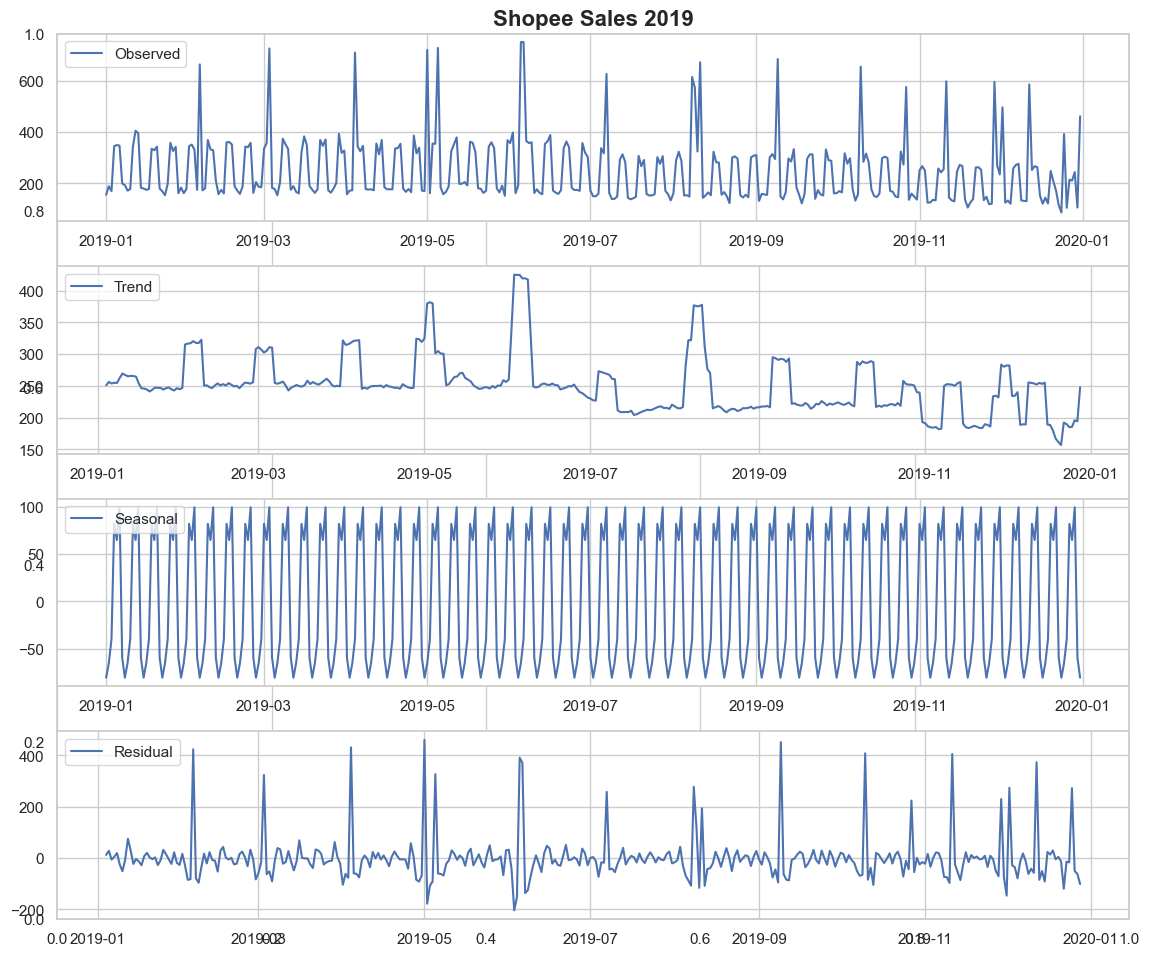

In [16]:
# Convert the 'order_day' column to datetime if it's not already
orders['order_day'] = pd.to_datetime(orders['order_time']).dt.date

# Set 'order_day' as the index and count the number of orders per day
daily_orders = orders.groupby('order_day').size()
daily_orders.index = pd.to_datetime(daily_orders.index)  # Ensure index is a DateTimeIndex

# Apply seasonal decomposition (adjust frequency as needed, e.g., daily=7 for weekly seasonality)
decomposition = seasonal_decompose(daily_orders, model='additive', period=7)  # Assuming weekly seasonality



# Plot the decomposed components
plt.figure(figsize=(12, 10))
plt.title("Shopee Sales 2019", fontsize=16, weight='bold')
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Analysis of Order Volume Based on Hours of Day
1. **Peak Order Times (7-9 AM)**:
   - There is a significant peak in orders during the early morning hours, especially from 7 AM to 9 AM. The highest spike is at 7 AM, where the number of orders reaches above 10,000.
   - This indicates that early morning is a popular time for placing orders, which could be due to people starting their day, ordering breakfast items, or setting up for business hours.

2. **Midday Consistency (11 AM - 3 PM)**:
   - From around 11 AM to 3 PM, there is a steady volume of orders with a peak at 3 PM, though less intense than the morning peak. This likely corresponds to lunch orders or afternoon transactions.
   - The order count in this period is relatively even, suggesting a stable demand.

3. **Lower Demand Period (4 PM - 5 PM)**:
   - There is a noticeable dip in order volumes between 4 PM and 6 PM, with the lowest point around 5 PM. This may indicate a period when fewer people are ordering, possibly due to it being the end of the workday or the time between lunch and dinner.

4. **Evening Rise (6 PM - 11 PM)**:
   - In the evening, orders rise again and remain relatively consistent from 7 PM through to around 11 PM. This pattern could be associated with dinner orders or people engaging in evening activities, leading to a renewed demand for goods or services.

5. **Early Morning and Late Night Lows**:
   - There is minimal order activity from midnight until around 6 AM, which is expected since this is typically a low-demand period as most people are asleep.

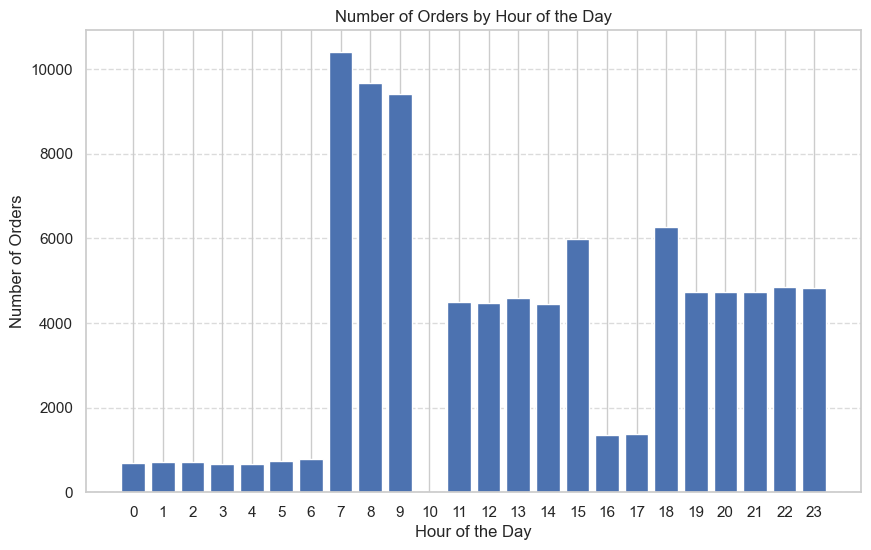

In [17]:
# Extract hour and count orders per hour
order_counts_by_hour = orders.groupby(orders['order_time'].dt.hour).size().reset_index(name='order_count')
order_counts_by_hour.columns = ['hour_of_day', 'order_count']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(order_counts_by_hour['hour_of_day'], order_counts_by_hour['order_count'])
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour of the Day')
plt.xticks(range(0, 24))  # Display all hours from 0 to 23 on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

## Average Order per Day for Regular and Sales Date

1. **Priority and Additional Mega Sales**: Confirming the peaks from previous analysis, Shopee mega sales dates (e.g., 11.11, 12.12) show a higher (almost triple) average number of orders per day, highlighting their potential effectiveness in driving customer engagement. Customers might be more motivated to make purchases due to exclusive discounts, extensive marketing, and the anticipation built around these major events.

C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_16484\3888408171.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='date_category', y='count', data=average_orders_by_category, palette='pastel', edgecolor='black')


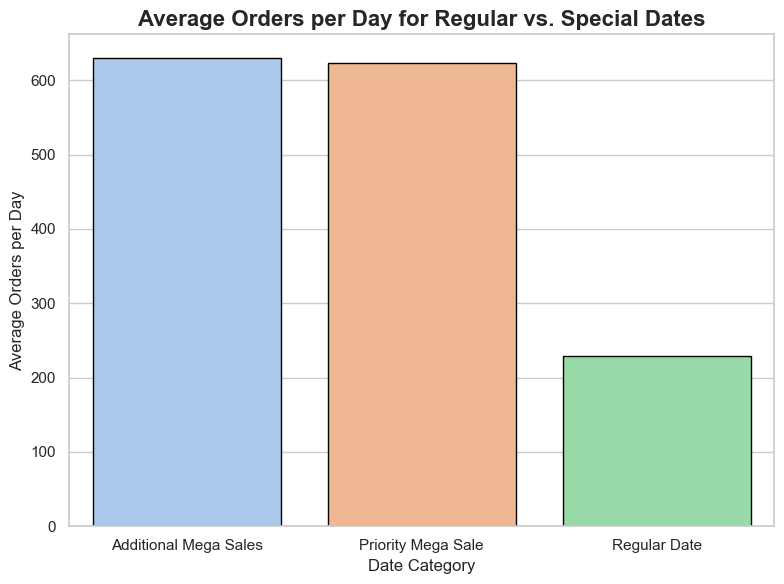

In [18]:
daily_orders = pd.DataFrame(daily_orders, columns=['count'])

# Assuming your daily_orders DataFrame with index 'order_day' and column 'count'
# Reset the index to make 'order_day' a column
daily_orders = daily_orders.reset_index()

# Convert 'order_day' to datetime format
daily_orders['order_day'] = pd.to_datetime(daily_orders['order_day'])

high_priority_mega_sales_dates = ['2019-11-11', '2019-09-09', '2019-10-10', '2019-12-12']
additional_mega_sales_dates = [
    '2019-03-03', '2019-04-04', '2019-05-05',
    '2019-06-06', '2019-07-07', '2019-08-08'
]

other_seasonal_sales_dates = [
    datetime(2019, 2, 5),   # Chinese New Year Sale
    datetime(2019, 5, 1),   # Labor Day Sale
    datetime(2019, 6, 5),   # Hari Raya Puasa Sale (Eid al-Fitr)
    datetime(2019, 8, 9),   # Singapore National Day Sale
    datetime(2019, 8, 11),  # Hari Raya Haji Sale (Eid al-Adha)
    datetime(2019, 10, 27), # Deepavali Sale (Diwali)
    datetime(2019, 12, 2),  # Cyber Monday Sale
    datetime(2019, 12, 25), # Christmas Sale
    datetime(2019, 12, 31)  # New Year’s Eve Sale
]

high_priority_seasonal_sales_dates = ['2019-11-29']

# Combine all dates into one list

high_priority_mega_sales_dates = [datetime.strptime(date, '%Y-%m-%d') for date in high_priority_mega_sales_dates]
additional_mega_sales_dates = [datetime.strptime(date, '%Y-%m-%d') for date in additional_mega_sales_dates]
high_priority_seasonal_sales_dates = [datetime.strptime(date, '%Y-%m-%d') for date in high_priority_seasonal_sales_dates]

more_special_dates = high_priority_mega_sales_dates + high_priority_seasonal_sales_dates
less_special_dates = additional_mega_sales_dates + other_seasonal_sales_dates


# Classify each date
daily_orders['date_category'] = 'Regular Date'  # Default category
daily_orders.loc[daily_orders['order_day'].isin(more_special_dates), 'date_category'] = 'Priority Mega Sale'
daily_orders.loc[daily_orders['order_day'].isin(less_special_dates), 'date_category'] = 'Additional Mega Sales'

# Calculate average orders per day for each category
average_orders_by_category = daily_orders.groupby('date_category')['count'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(8, 6))
sns.barplot(x='date_category', y='count', data=average_orders_by_category, palette='pastel', edgecolor='black')
plt.title("Average Orders per Day for Regular vs. Special Dates", fontsize=16, weight='bold')
plt.xlabel("Date Category", fontsize=12)
plt.ylabel("Average Orders per Day", fontsize=12)
plt.tight_layout()
plt.show()


## Shopee Gross Merchandise Value (GMV) Analysis 2019

## Initial Analysis Based on Daily and Weekly GMV Trend

1. **Special Dates Consistently Above Average GMV**:
   - The graph shows that GMV on special dates (highlighted sales events like 11.11, 12.12, etc.) consistently stays above the average GMV line. This might suggests that these special events are consistent in boosting GMV, making them high-performing days in terms of sales volume.

2. **Regular Days with Mixed GMV Patterns**:
   - While there are peaks on some regular days that reach or even exceed the average GMV line, many other regular days fall below average. This creates a mixed pattern where certain regular days perform well, but a substantial number of low-GMV days contribute to a lower yearly average.

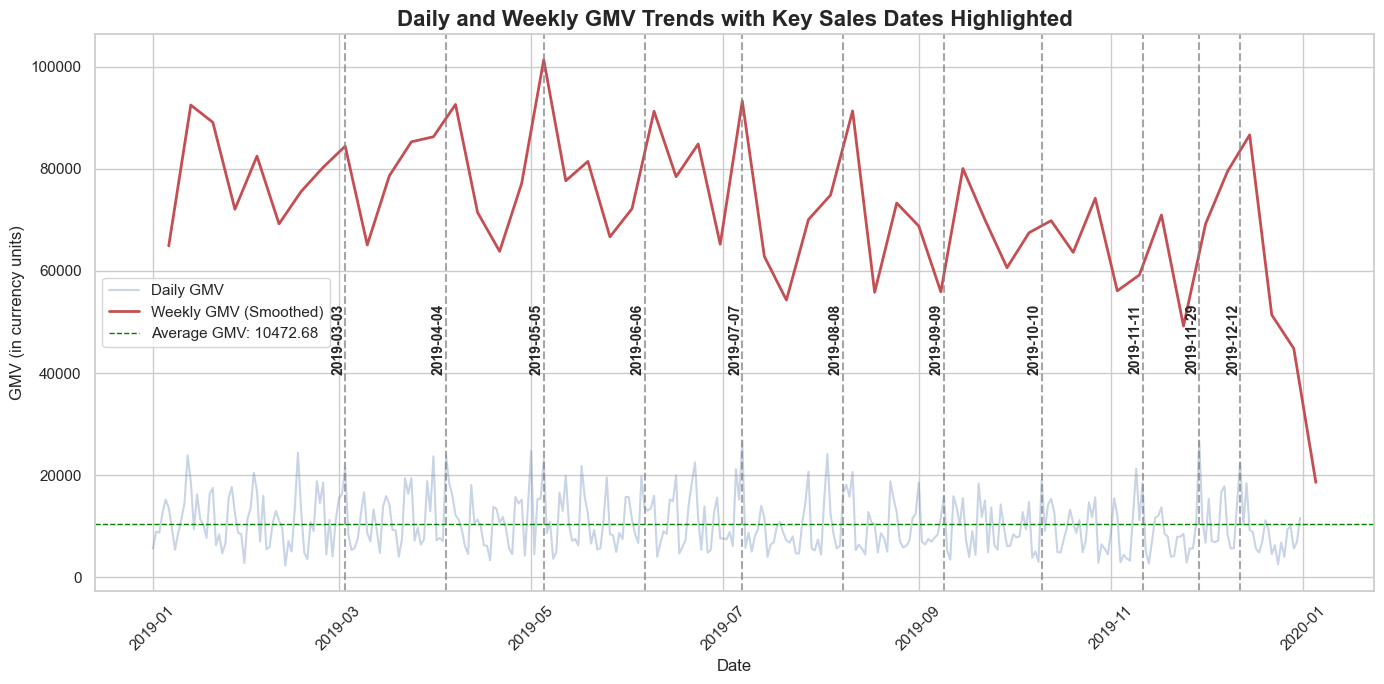

In [19]:
# Calculate daily GMV by summing 'checkout_price' for each 'order_date'
daily_gmv = orders.groupby('order_date')['checkout_price'].sum().reset_index()

# Rename columns for clarity
daily_gmv.columns = ['date', 'daily_gmv']

# Define special dates with categories for annotations
high_priority_mega_sales_dates = ['2019-11-11', '2019-09-09', '2019-10-10', '2019-12-12']
additional_mega_sales_dates = [
    '2019-03-03', '2019-04-04', '2019-05-05',
    '2019-06-06', '2019-07-07', '2019-08-08'
]

other_seasonal_sales_dates = [
    datetime(2019, 2, 5),   # Chinese New Year Sale
    datetime(2019, 5, 1),   # Labor Day Sale
    datetime(2019, 6, 5),   # Hari Raya Puasa Sale (Eid al-Fitr)
    datetime(2019, 8, 9),   # Singapore National Day Sale
    datetime(2019, 8, 11),  # Hari Raya Haji Sale (Eid al-Adha)
    datetime(2019, 10, 27), # Deepavali Sale (Diwali)
    datetime(2019, 12, 2),  # Cyber Monday Sale
    datetime(2019, 12, 25), # Christmas Sale
    datetime(2019, 12, 31)  # New Year’s Eve Sale
]

high_priority_seasonal_sales_dates = ['2019-11-29']

# Create a dictionary for all special dates with descriptive labels
special_dates = {f'{date}': date for date in high_priority_mega_sales_dates}
special_dates.update({f'{date}': date for date in additional_mega_sales_dates})
# special_dates.update({f'{date.date()}': date for date in other_seasonal_sales_dates})
special_dates.update({f'{date}': date for date in high_priority_seasonal_sales_dates})



# Convert special_dates values to datetime format
special_dates = {k: pd.to_datetime(v) for k, v in special_dates.items()}

# Calculate weekly GMV for smoothing
daily_gmv['date'] = pd.to_datetime(daily_gmv['date'])
weekly_gmv = daily_gmv.set_index('date').resample('W').sum().reset_index()

plt.figure(figsize=(14, 7))

# Plot daily GMV
plt.plot(daily_gmv['date'], daily_gmv['daily_gmv'], label='Daily GMV', color='b', alpha=0.3)
# Plot weekly GMV for smoothing
plt.plot(weekly_gmv['date'], weekly_gmv['daily_gmv'], label='Weekly GMV (Smoothed)', color='r', linewidth=2)

# Add annotations for special dates
for label, date in special_dates.items():
    plt.axvline(date, color='gray', linestyle='--', alpha=0.7)
    plt.text(date, daily_gmv['daily_gmv'].max() * 2, label, rotation=90, verticalalignment='top', horizontalalignment='right', fontsize=10, weight='bold')

# Add average line for baseline comparison
average_gmv = daily_gmv['daily_gmv'].mean()
plt.axhline(average_gmv, color='green', linestyle='--', linewidth=1, label=f'Average GMV: {average_gmv:.2f}')

# Finalize the plot
plt.title("Daily and Weekly GMV Trends with Key Sales Dates Highlighted", fontsize=16, weight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("GMV (in currency units)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



## Average of Daily GMV for Regular vs. Special Dates

1. **Higher Average GMV on Mega Sales Days**:
   - Both Priority and Additional Mega Sales show higher average GMV per day than regular dates, aligning with the observation that special dates tend to drive higher engagement. 

2. **Regular Dates**:
   - Although some regular days have high GMV, the substantial number of regular days with below-average GMV pulls down the overall average. This reinforces that while regular days can have their own peaks, many still underperform compared to special sale events.

C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_16484\3268419409.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='date_category', y='daily_gmv', data=average_gmv_by_category, palette='pastel', edgecolor='black')


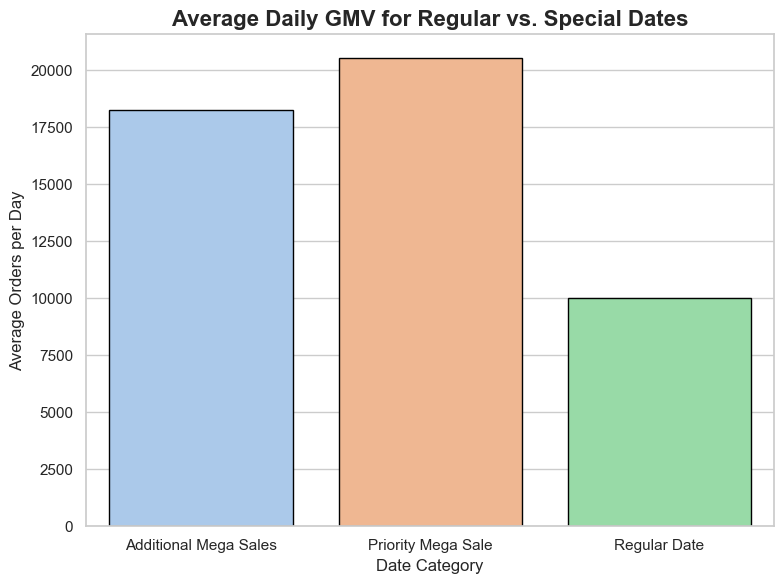

In [20]:
# Classify each date
daily_gmv['date_category'] = 'Regular Date'  # Default category
daily_gmv.loc[daily_orders['order_day'].isin(more_special_dates), 'date_category'] = 'Priority Mega Sale'
daily_gmv.loc[daily_orders['order_day'].isin(less_special_dates), 'date_category'] = 'Additional Mega Sales'

# Calculate average orders per day for each category
average_gmv_by_category = daily_gmv.groupby('date_category')['daily_gmv'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(8, 6))
sns.barplot(x='date_category', y='daily_gmv', data=average_gmv_by_category, palette='pastel', edgecolor='black')
plt.title("Average Daily GMV for Regular vs. Special Dates", fontsize=16, weight='bold')
plt.xlabel("Date Category", fontsize=12)
plt.ylabel("Average Orders per Day", fontsize=12)
plt.tight_layout()
plt.show()


## Possible Key Factors Influencing Customer Purchasing Behavior Based on Temporal Analysis

1. **Special Sales Events**: Priority and Additional Mega Sales (e.g., 11.11, 12.12) consistently generate higher-than-average orders and GMV, suggesting that limited-time deals and extensive marketing during these events might encourage more purchases.

2. **Weekly Cycles**: Weekly trends indicate higher engagement on certain days, like weekends, implying that natural shopping habits may influence purchase timing, independent of large sales events.

3. **Peak Hours**: Based on the hourly analysis, there is a notable spike in order volume between 7 AM and 9 AM, with another increase in engagement during the evening hours from 6 PM to 11 PM. This pattern suggests that customers might be more active in the early morning and later in the evening, potentially due to morning routines and evening relaxation time.

<br>

---

### Key Insights on Order Volume and GMV Based on Temporal Analysis

1. **Mega Sales Events as Key Revenue Drivers**
    Sales events like 11.11 and 12.12 contribute significantly to Shopee’s GMV, underscoring their importance as high-performing revenue days.
   - **Actionable Insight for Marketing Team**: Focus marketing resources on these events to maximize reach. Tailor campaigns to highlight exclusive discounts and deals that drive urgency.
   - **Actionable Insight for Business Analyst Team**: Monitor which customer segments respond most to mega sales events to refine audience targeting and future campaign designs.

2. **Recurring Double-Date Events for Consistent Engagement**
   Monthly double-date events like 2.2, 9.9, and 10.10 create predictable spikes in order volume. These events are effective in maintaining engagement between larger sales.
   - **Actionable Insight for Marketing Team**: Position double-date sales as part of a recurring campaign series to establish them as anticipated shopping days. Increase pre-event awareness to keep engagement high.
   - **Actionable Insight for Business Analyst Team**: Identify categories or products that perform exceptionally well during these events and use that data to drive stocking and promotional decisions.

3. **Weekend Peaks Suggest Strategic Opportunity for Regular Promotions**
   Weekend sales see consistent order volume increases, suggesting higher customer activity.
   - **Actionable Insight for Marketing Team**: Consider launching regular “Weekend Deals” or “Flash Sales” to build on this natural increase in activity.
   - **Actionable Insight for Business Analyst Team**: Segment customers who are highly active on weekends and target them with personalized offers, potentially increasing order frequency.
   
4. **Possible Deals for Peak Hours**: The identified peak hours (7 AM - 9 AM and 6 PM - 11 PM) represent optimal times for flash sales and limited-timeoffers, as customer engagement is naturally higher during these periods.
   - **Actionable Insight for Marketing Team**: Launch flash deals and time-limited offers during these hours to leverage high traffic and drive urgency. Experiment with exclusive discounts or limited-quantity promotions to encourage more purchases during these peak periods.
   - **Actionable Insight for Business Analyst Team**: Track order volume and GMV metrics during these peak hours to gauge the effectiveness of these flash deals and further fine-tune promotions based on response rates.

5. **Inconsistent GMV on Regular Days**
   Regular weekdays show variable GMV performance, with many days falling below the average.
   - **Actionable Insight for Marketing Team**: Implement smaller, targeted promotions on regular days to boost sales consistency. Highlight product categories with steady demand to attract repeat purchases.
   - **Actionable Insight for Business Analyst Team**: Track daily GMV trends and experiment with regular-day promotions to understand which tactics work best to elevate baseline sales.

6. **Post-Mega Sale Engagement Strategies**
   - **Insight**: There is a slight decline in sales after large events, likely due to customer spending fatigue.
   - **Actionable Insight for Marketing Team**: Shift post-event marketing focus towards value-based offers and loyalty rewards to encourage light engagement without overwhelming customers.
   - **Actionable Insight for Business Analyst Team**: Assess long-term customer retention metrics post-event to fine-tune event spacing and frequency for sustained engagement without fatigue.
---

# Overview on Shopee Products

## Analysis on Order Volume Based on Product Category

**1. High-Demand Categories**

- **Men's Clothes, Health & Beauty, and Women's Clothes**: These categories have the highest order counts, each exceeding 10,000 orders. This indicates that fashion and personal care are highly popular among customers. These categories likely cater to a broad demographic, covering a wide range of personal style and self-care needs.

- **Mobile & Accessories, Baby & Toys, and Home & Living**: These categories also show strong demand, with order counts ranging between 6,000 and 8,000. The high order volume in **Mobile & Accessories** reflects the popularity of smartphones and related accessories, which are frequently purchased and replenished. The **Baby & Toys** and **Home & Living** categories suggest that customers view the platform as a source for family and lifestyle-supporting products.

**2. Mid-Demand Categories**

- **Groceries & Pets, Home Appliances, Sports & Outdoor, Automotive**: These categories have moderate order volumes, with counts ranging between 4,000 and 5,000. This suggests steady customer interest in essential and recreational products, possibly indicating that these categories are used to fulfill routine or specific needs.

- **Women's Bags, Watches, Men's Bags & Wallets**: These accessory categories show moderate demand, with order counts close to 3,000. These products might be viewed as occasional purchases, contributing to a steady but not overwhelming order volume.

**3. Lower-Demand Categories**

- **Cameras & Drones, Women's Shoes, Fashion Accessories**: These categories have relatively lower order counts, below 2,500. This could indicate more selective or less frequent purchasing in these areas, possibly due to higher price points or niche customer interests.

- **Computer & Accessories, Games, Books & Hobbies, Men's Shoes**: These categories also see lower order volumes, suggesting that they might cater to specific segments of the customer base with occasional purchasing needs.

**4. Niche and Specialized Categories**

- **Travel & Luggage, Gaming & Consoles, Tickets & Vouchers, Others**: These categories have the lowest order counts, falling below 1,000. This suggests that they cater to more specialized or sporadic needs, and are not a primary focus for most customers. **Travel & Luggage** and **Tickets & Vouchers** may see occasional spikes due to seasonal events or promotions but otherwise remain low in demand.

<br>

---

C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_16484\203733926.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_per_category.index, y=order_per_category.values, palette="viridis", edgecolor="black")


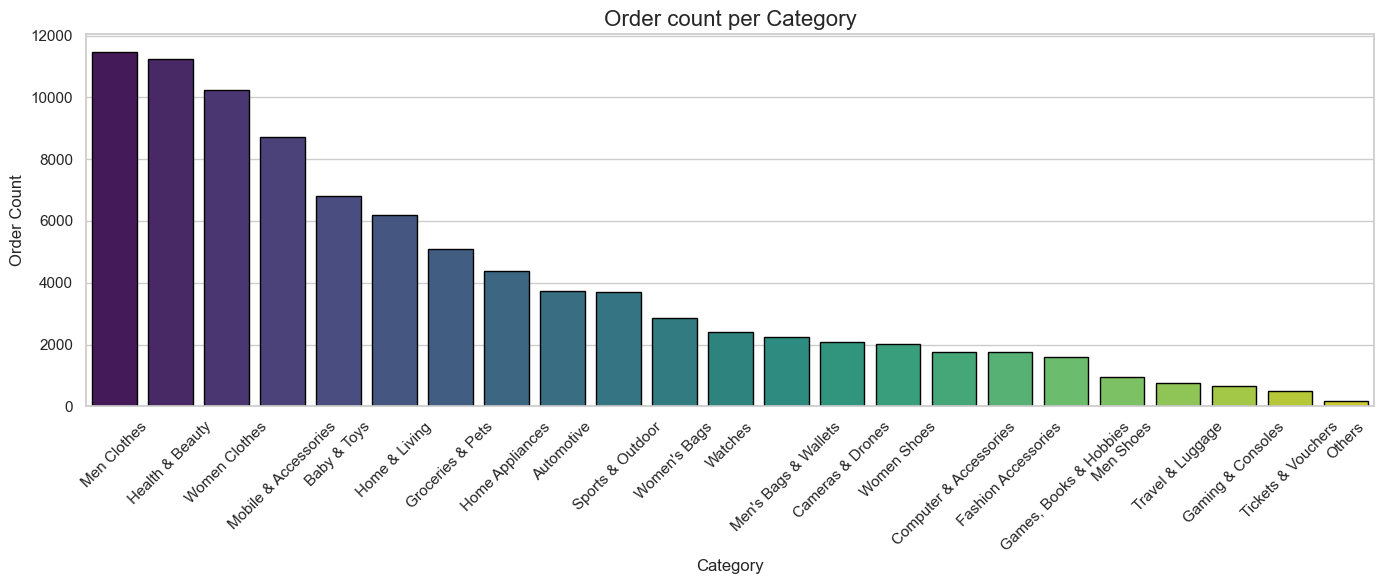

In [21]:
# Calculate GMV per category by summing up the checkout_price for each main_category
order_per_category = orders.groupby('main_category')['checkout_price'].count().sort_values(ascending=False)

# Plotting GMV per category
plt.figure(figsize=(14, 6))
sns.barplot(x=order_per_category.index, y=order_per_category.values, palette="viridis", edgecolor="black")
plt.title("Order count per Category", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Order Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analysis on GMV Based on Product Category

**1. High-GMV Categories**

- **Mobile & Accessories, Cameras & Drones, and Watches**: These categories have the highest GMV, each nearing or exceeding 600,000. The high GMV suggests that these categories contain high-value items, possibly with larger price tags, which contribute significantly to overall revenue. **Mobile & Accessories** leads, reflecting the high demand and value associated with smartphones and related gadgets. **Cameras & Drones** and **Watches** also indicate significant revenue generation, likely due to the high cost of items in these categories.

- **Home Appliances**: With a GMV slightly below the top three categories, **Home Appliances** also generates substantial revenue, around 500,000. This category likely includes higher-priced items like kitchen appliances and household electronics, contributing to its high GMV despite potentially lower order volume compared to categories like fashion.

**2. Mid-GMV Categories**

- **Men's Clothes, Computer & Accessories, Sports & Outdoor**: These categories have moderate GMV, with values ranging from 200,000 to 300,000. **Men's Clothes** may have a high order volume but lower price points, balancing out to a mid-range GMV. **Computer & Accessories** and **Sports & Outdoor** show solid performance in terms of revenue, indicating steady demand and moderately priced items.

- **Baby & Toys, Health & Beauty**: Both categories fall within the mid-GMV range, suggesting that while these items might be ordered frequently, their lower individual prices contribute to a moderate overall GMV.

**3. Lower-GMV Categories**

- **Men's Bags & Wallets, Women's Clothes, Travel & Luggage**: These categories show lower GMV, falling between 100,000 and 150,000. This could be due to a combination of moderate order volumes and relatively lower prices per item compared to high-GMV categories.

- **Women's Bags, Groceries & Pets, Home & Living**: These categories also show relatively low GMV, indicating that while they might see frequent orders, the price points are generally lower, resulting in a smaller contribution to overall revenue.

**4. Niche and Specialized Categories**

- **Tickets & Vouchers, Automotive, Women's Shoes**: These categories have some of the lowest GMV values, with less than 100,000 each. **Tickets & Vouchers** might be event-driven and could have limited consistent demand, while **Automotive** and **Women's Shoes** may reflect specialized purchases with occasional demand.

- **Games, Books & Hobbies, Fashion Accessories, Gaming & Consoles, Others**: These categories generate minimal GMV, with values well below 100,000. This suggests they either cater to highly specialized interests or have low purchase frequency and lower price points.

<br>

---

C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_16484\710994010.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gmv_per_category.index, y=gmv_per_category.values, palette="viridis", edgecolor="black")


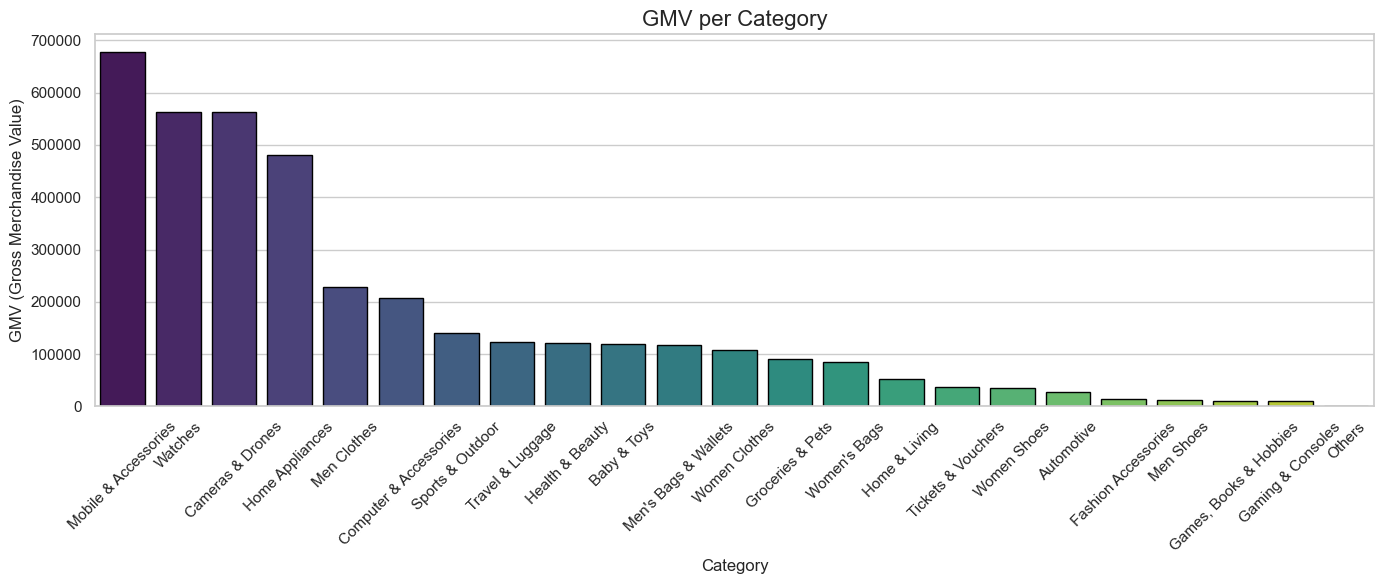

In [22]:
# Calculate GMV per category by summing up the checkout_price for each main_category
gmv_per_category = orders.groupby('main_category')['checkout_price'].sum().sort_values(ascending=False)

# Plotting GMV per category
plt.figure(figsize=(14, 6))
sns.barplot(x=gmv_per_category.index, y=gmv_per_category.values, palette="viridis", edgecolor="black")
plt.title("GMV per Category", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("GMV (Gross Merchandise Value)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analysis on Order Volume by Price Range

**1. Majority of Orders in Low Price Ranges**:
   - The largest volume of orders falls within the **(0, 1]** price range, with over 25,000 orders. This indicates that most orders are for lower-priced items, which may suggest that customers frequently purchase inexpensive products, possibly as impulse buys or small, routine purchases.
   - The next price range, **(1, 2]**, also has a significant number of orders, contributing to the high volume of low-cost transactions.

**2. Decreasing Order Volume with Higher Price Ranges**:
   - As the price range increases, the total number of orders decreases substantially. Price ranges from **(2, 5]** to **(20, 50]** still have a fair amount of activity, indicating some customer willingness to spend on moderately priced items.
   - Higher price ranges, especially those above **(50, 100]**, see a sharp decline in the number of orders. Orders in ranges **(100, 500]**, **(500, 1000]**, and **(1000, 10000]** are minimal, showing limited demand for high-priced items.

**3. High Demand for Affordable Products**:
   - The cumulative percentage reaches approximately 80% by the **(10, 20]** price range, indicating that most of the orders are concentrated within the lower price ranges.
   - The data suggests that customers primarily shop for affordable products, with a majority of the orders concentrated in the lower price brackets. This could reflect a price-sensitive customer base that prefers value-driven purchases over high-cost items.

<br>

---

C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_16484\4231874211.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_sales = orders.groupby(price_bins)['checkout_price'].count()
C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_16484\4231874211.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_sales.index.astype(str), y=price_sales.values, palette="crest", edgecolor="black")
C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_16484\4231874211.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rota

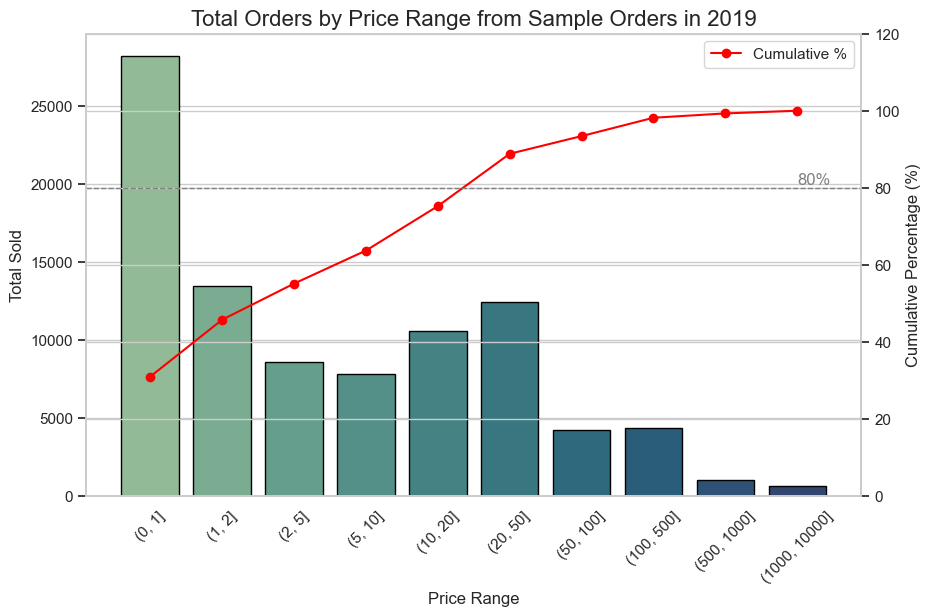

In [23]:
# Total Sold by Price Range with Pareto Chart
plt.figure(figsize=(10, 6))

# Define price bins and calculate total sales per bin
price_bins = pd.cut(orders['checkout_price'], bins=[0, 1, 2, 5, 10, 20, 50, 100, 500, 1000, 10000])
price_sales = orders.groupby(price_bins)['checkout_price'].count()

# Calculate cumulative percentage for Pareto line
cumulative_sales = price_sales.cumsum()
cumulative_percentage = 100 * cumulative_sales / cumulative_sales.iloc[-1]

# Create bar plot
sns.barplot(x=price_sales.index.astype(str), y=price_sales.values, palette="crest", edgecolor="black")

# Create a secondary y-axis for the cumulative percentage
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(price_sales.index.astype(str), cumulative_percentage, color="red", marker="o", linestyle="-", label="Cumulative %")
ax2.set_ylabel("Cumulative Percentage (%)", fontsize=12)
ax2.set_ylim(0, 120)  # Set y-axis limit for percentage

# Highlight the 80% line (Pareto threshold)
ax2.axhline(80, color="gray", linestyle="--", linewidth=1)
ax2.text(len(price_sales) - 1, 80, "80%", color="gray", va="bottom")

# Titles and labels
ax1.set_title("Total Orders by Price Range from Sample Orders in 2019", fontsize=16)
ax1.set_xlabel("Price Range", fontsize=12)
ax1.set_ylabel("Total Sold", fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.legend(loc="upper right")

# Show plot
plt.show()

Looking at the total orders over all time, a similar trend still applies, with the majority of orders concentrated in the lower price ranges.

---

### Analysis on Order Volume by Price Range All Time (2015-2019)

**1. Majority of Orders in Low Price Ranges**:
   - The **(0, 1]** price range has the highest volume of orders, surpassing 8 million orders, indicating that low-priced items continue to dominate total orders over time. This pattern suggests that customers are consistently purchasing low-cost items, possibly due to the platform's appeal for small, affordable purchases.
   - The **(1, 2]** price range follows with a substantial number of orders, reinforcing the idea that price-sensitive customers are a significant part of the customer base.

**2. Decreasing Order Volume with Increasing Price Ranges**:
   - As seen previously, there is a steady decline in order volume as the price range increases. Price ranges **(2, 5]** and **(5, 10]** maintain moderate activity, indicating that customers are willing to spend on moderately priced items, but demand drops considerably for higher price ranges.
   - Orders in the **(20, 50]** and above price brackets show a noticeable decrease, with orders in the **(1000, 10000]** range being almost negligible. This indicates that high-priced items contribute minimally to total order counts.

**3. Sustained Demand for Affordable Products**:
   - The cumulative percentage line shows that approximately 80% of total orders are covered by price ranges up to around **(10, 20]**. This confirms that a large proportion of orders come from low-cost items, with higher price ranges contributing less to the overall order count.
   - The data illustrates that customer preference for affordable products remains consistent over time. Lower price ranges consistently capture the highest order volumes, suggesting a predominantly price-sensitive customer base that continues to prioritize low-cost purchases.

<br>


---

C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_16484\3025721269.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_sales = products.groupby(price_bins)['total_sold'].sum()
C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_16484\3025721269.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_sales.index.astype(str), y=price_sales.values, palette="crest", edgecolor="black")
C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_16484\3025721269.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation

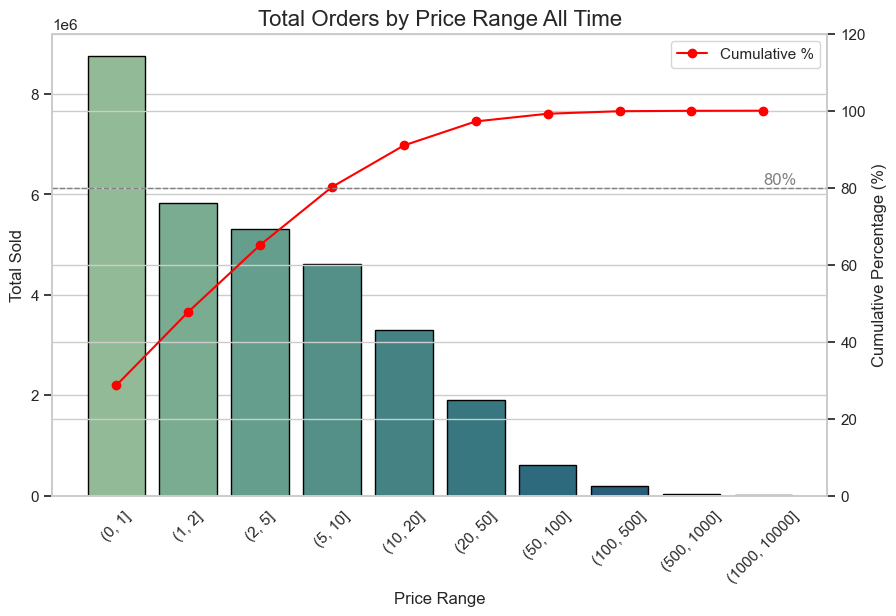

In [24]:
# Total Sold by Price Range with Pareto Chart
plt.figure(figsize=(10, 6))

# Define price bins and calculate total sales per bin
price_bins = pd.cut(products['price_actual'], bins=[0, 1, 2, 5, 10, 20, 50, 100, 500, 1000, 10000])
price_sales = products.groupby(price_bins)['total_sold'].sum()

# Calculate cumulative percentage for Pareto line
cumulative_sales = price_sales.cumsum()
cumulative_percentage = 100 * cumulative_sales / cumulative_sales.iloc[-1]

# Create bar plot
sns.barplot(x=price_sales.index.astype(str), y=price_sales.values, palette="crest", edgecolor="black")

# Create a secondary y-axis for the cumulative percentage
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(price_sales.index.astype(str), cumulative_percentage, color="red", marker="o", linestyle="-", label="Cumulative %")
ax2.set_ylabel("Cumulative Percentage (%)", fontsize=12)
ax2.set_ylim(0, 120)  # Set y-axis limit for percentage

# Highlight the 80% line (Pareto threshold)
ax2.axhline(80, color="gray", linestyle="--", linewidth=1)
ax2.text(len(price_sales) - 1, 80, "80%", color="gray", va="bottom")

# Titles and labels
ax1.set_title("Total Orders by Price Range All Time", fontsize=16)
ax1.set_xlabel("Price Range", fontsize=12)
ax1.set_ylabel("Total Sold", fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.legend(loc="upper right")

# Show plot
plt.show()


### Key Takeaways

- **Focus on Low-Cost Products**: The platform may benefit from focusing on expanding low-cost offerings and providing promotions or discounts within the **(0, 1]** to **(5, 10]** price ranges to capitalize on demand.
  
- **Targeted Strategies for Mid-Range Price Brackets**: Price ranges **(5, 10]** to **(20, 50]** still show notable activity, indicating an opportunity to target customers in these segments with upselling or cross-selling strategies to boost sales in the mid-price range.

- **Price Sensitivity**: The steep decline in order volume as prices increase suggests that the customer base is generally price-sensitive. Price-sensitive strategies, such as loyalty rewards for frequent purchases in lower price ranges or installment options for higher-priced items, could encourage purchases across a broader range.

- **Consistent 80/20 Rule**: With around 80% of orders coming from lower price ranges, optimizing inventory and promotions within these segments will likely yield high returns. The remaining higher price ranges could be targeted with specific marketing campaigns for niche audiences.

This analysis underscores the importance of affordable products in driving consistent order volume over time and highlights strategies to maintain engagement with a predominantly price-sensitive customer base.

---

## Analysis of Discount Usage in Orders

**1. High Usage of Discounts (60%)**:
   - A significant majority, **60%** of orders, were placed using a discount. This highlights the importance of discounts in customer purchasing behavior, suggesting that many customers are inclined to make a purchase when there is a financial incentive or price reduction involved.
   - This may reflect a price-sensitive customer base that actively seeks discounts or promotions when shopping.

**2. Orders Without Discount (40%)**:
   - The remaining **40%** of orders were placed without any discount. While this is lower than the orders with discounts, it still represents a sizable portion of customers willing to purchase at full price.
   - This could indicate a segment of customers who prioritize convenience, product availability, or quality over cost savings.

<br>

---


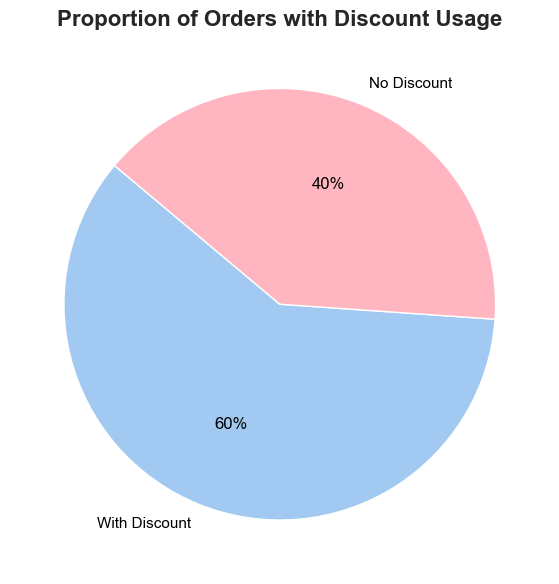

In [25]:
# Define pastel color palettes for discount and campaign pie charts
discount_colors = ['#A1C9F1', '#FFB6C1']  # Pastel blue and pastel pink
campaign_colors = ['#B5EAD7', '#FFDAC1']  # Pastel green and pastel peach

# 1. Proportion of clients using discounts
plt.figure(figsize=(6, 6))
discount_usage = orders['total_discount'].apply(lambda x: 'With Discount' if x > 0 else 'No Discount').value_counts()
plt.pie(discount_usage, labels=discount_usage.index, autopct='%1.0f%%', startangle=140, colors=discount_colors,
        textprops={'color': 'black'}, wedgeprops={'edgecolor': 'white'})

# Adding the title
plt.title("Proportion of Orders with Discount Usage", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

## Analysis of Impact of Rating on Orders from Sample Orders in 2019

1. **Preference for Highly Rated Products**:
   - The significant number of orders in the **4** and **5-star** bins implies that customers actively seek out products with positive feedback, possibly viewing high ratings as a measure of product reliability, quality, or customer satisfaction.
   - The low to negligible presence of orders in the **1-3 star** bins reinforces this idea, as customers appear to avoid lower-rated products.

2. **Trust in High Ratings**:
   - Since the majority of orders are associated with products rated 4 stars or higher, it’s clear that customers trust ratings as an indicator of product quality. This behavior suggests that high ratings play an essential role in the purchase decision-making process, likely encouraging customers to feel more confident about their choice.
   
3. **Impact on Purchase Decisions**:
   - The cumulative effect shows that 4- and 5-star rated products account for nearly 100% of purchases, supporting the notion that ratings are a critical factor influencing customer choice.
   - Customers may view high ratings as a shortcut for assessing quality, reducing the risk of dissatisfaction.

   Looking at the total orders by coarse rating bin over all time, a similar trend confirms that **ratings play an important role** in customer purchasing decisions.
   
<br>

---

### Analysis of Impact of Rating on Orders All Time (2015-2019)

**1. Strong Preference for Highly Rated Products**:
   - Just as with the sample orders, the majority of all-time orders are associated with products in the **4- and 5-star rating bins**. The 4-star rating bin alone accounts for a substantial majority of orders, with more than 2.5 million total orders, while 5-star products follow with over half a million orders.
   - This high concentration of orders within these top two rating bins underscores a customer preference for well-rated products, indicating that customers likely view ratings as a measure of quality and reliability.

**2. Minimal Orders for Low-Rated Products**:
   - There is virtually no order activity in the 1-3 star bins, showing that poorly rated products see minimal demand. This reinforces the notion that customers avoid lower-rated products when making purchasing decisions, focusing instead on items with strong positive feedback.

**3. Ratings as a Consistent Driver of Sales**:
   - The similarity in trends over both sample and all-time data highlights that ratings have a long-term impact on customer behavior. Customers appear to rely heavily on ratings as a filter when choosing products, reflecting the importance of positive ratings in maintaining product visibility and attractiveness.

<br>

---

C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_16484\973364530.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_sales = orders.groupby('rating_bin')['checkout_price'].count()
C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_16484\973364530.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=rating_sales.index.astype(str), y=rating_sales.values, palette="crest", edgecolor="black", order=rating_sales.index.astype(str))


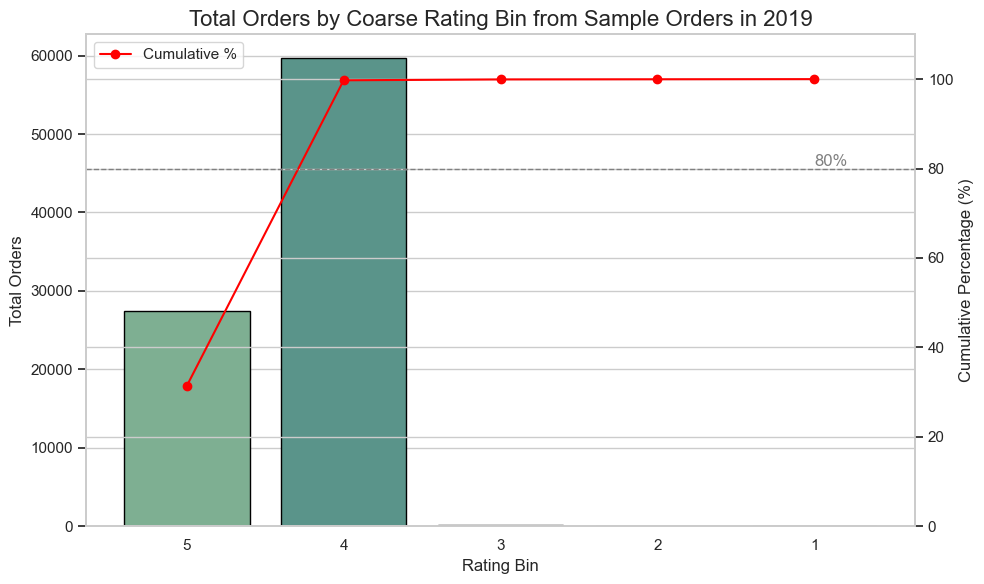

C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_16484\973364530.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_rating_sales = products.groupby('rating_bin')['total_sold'].sum()
C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_16484\973364530.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=product_rating_sales.index.astype(str), y=product_rating_sales.values, palette="crest", edgecolor="black", order=product_rating_sales.index.astype(str))


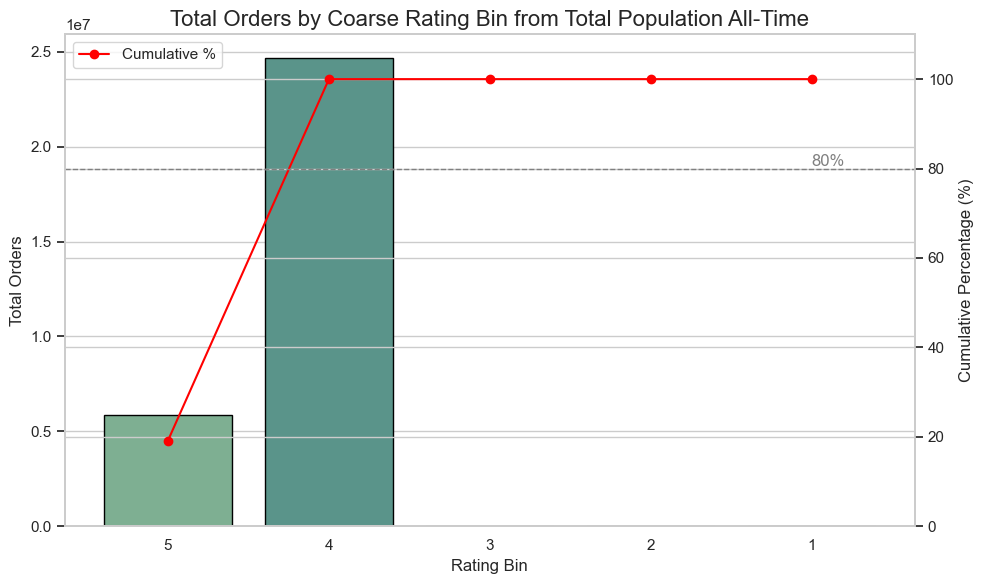

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Coarse Rating Bins (1, 2, 3, 4, 5) for Orders DataFrame
rating_bins = [1, 2, 3, 4, 5, 6]  # Adding 6 as an upper bound to include 5.0 in the last bin
orders['rating_bin'] = pd.cut(orders['item_rating'], bins=rating_bins, labels=[1, 2, 3, 4, 5], right=False)
rating_sales = orders.groupby('rating_bin')['checkout_price'].count()
rating_sales = rating_sales.sort_index(ascending=False)
cumulative_sales = rating_sales.cumsum()
cumulative_percentage = 100 * cumulative_sales / cumulative_sales.iloc[-1]
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x=rating_sales.index.astype(str), y=rating_sales.values, palette="crest", edgecolor="black", order=rating_sales.index.astype(str))
plt.title("Total Orders by Coarse Rating Bin from Sample Orders in 2019", fontsize=16)
plt.xlabel("Rating Bin", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)

ax2 = ax1.twinx()
ax2.plot(rating_sales.index.astype(str), cumulative_percentage, color="red", marker="o", linestyle="-", label="Cumulative %")
ax2.set_ylabel("Cumulative Percentage (%)", fontsize=12)
ax2.set_ylim(0, 110)

ax2.axhline(80, color="gray", linestyle="--", linewidth=1)
ax2.text(len(rating_sales) - 1, 80, "80%", color="gray", va="bottom")
ax2.legend(loc="upper left")
plt.tight_layout()
plt.show()


# 2. Coarse Rating Bins (1, 2, 3, 4, 5) for Products DataFrame (Total Population)
products['rating_bin'] = pd.cut(products['item_rating'], bins=rating_bins, labels=[1, 2, 3, 4, 5], right=False)
product_rating_sales = products.groupby('rating_bin')['total_sold'].sum()

product_rating_sales = product_rating_sales.sort_index(ascending=False)
cumulative_product_sales = product_rating_sales.cumsum()
cumulative_product_percentage = 100 * cumulative_product_sales / cumulative_product_sales.iloc[-1]
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x=product_rating_sales.index.astype(str), y=product_rating_sales.values, palette="crest", edgecolor="black", order=product_rating_sales.index.astype(str))
plt.title("Total Orders by Coarse Rating Bin from Total Population All-Time", fontsize=16)
plt.xlabel("Rating Bin", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
ax2 = ax1.twinx()
ax2.plot(product_rating_sales.index.astype(str), cumulative_product_percentage, color="red", marker="o", linestyle="-", label="Cumulative %")
ax2.set_ylabel("Cumulative Percentage (%)", fontsize=12)
ax2.set_ylim(0, 110)

ax2.axhline(80, color="gray", linestyle="--", linewidth=1)
ax2.text(len(product_rating_sales) - 1, 80, "80%", color="gray", va="bottom")
ax2.legend(loc="upper left")

plt.tight_layout()
plt.show()

### Analysis of Orders by Fine Rating (Sample Orders and All Time)

**1. High Preference for Top Ratings (5.0 and 4.9)**:
   - The majority of orders come from products with **5.0** and **4.9** ratings, with 5.0-rated products totaling around 25,000 orders and 4.9-rated products reaching nearly 40,000 orders.
   - Together, these two ratings account for a significant portion of total orders, as shown by the cumulative percentage line, which exceeds the 80% threshold within these top two ratings. This suggests that customers overwhelmingly prefer products with near-perfect ratings, indicating that high ratings play a crucial role in purchase decisions.

**2. Gradual Decline in Orders for Slightly Lower Ratings (4.8 to 4.5)**:
   - Orders start to decline noticeably with ratings of **4.8** and lower. Products with ratings between **4.7** and **4.5** see progressively fewer orders, suggesting that even slight decreases in rating can impact customer interest.
   - This trend highlights that customers may perceive even small rating differences as significant when choosing products, favoring items that consistently receive higher reviews.

**3. Minimal Orders for Ratings Below 4.5**:
   - Products with ratings of **4.4** or lower have very few orders. This further emphasizes that customers are likely to avoid products with lower ratings, perhaps viewing them as less trustworthy or of lower quality.
   - The near-zero order count for ratings closer to 4.0 suggests that customers are highly selective and rely heavily on ratings as an indicator of product reliability.

**4. Strong Positive Bias in Rating Preferences**:
   - The cumulative line illustrates a classic Pareto distribution, where **80% of orders come from products rated 4.9 and above**. This indicates that customers heavily favor top-rated products, and even slight drops in rating below 4.9 can significantly reduce a product’s attractiveness.

<br>

---

C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_16484\3368001537.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=fine_rating_sales.index.astype(str), y=fine_rating_sales.values, palette="crest", edgecolor="black", order=fine_rating_sales.index.astype(str))


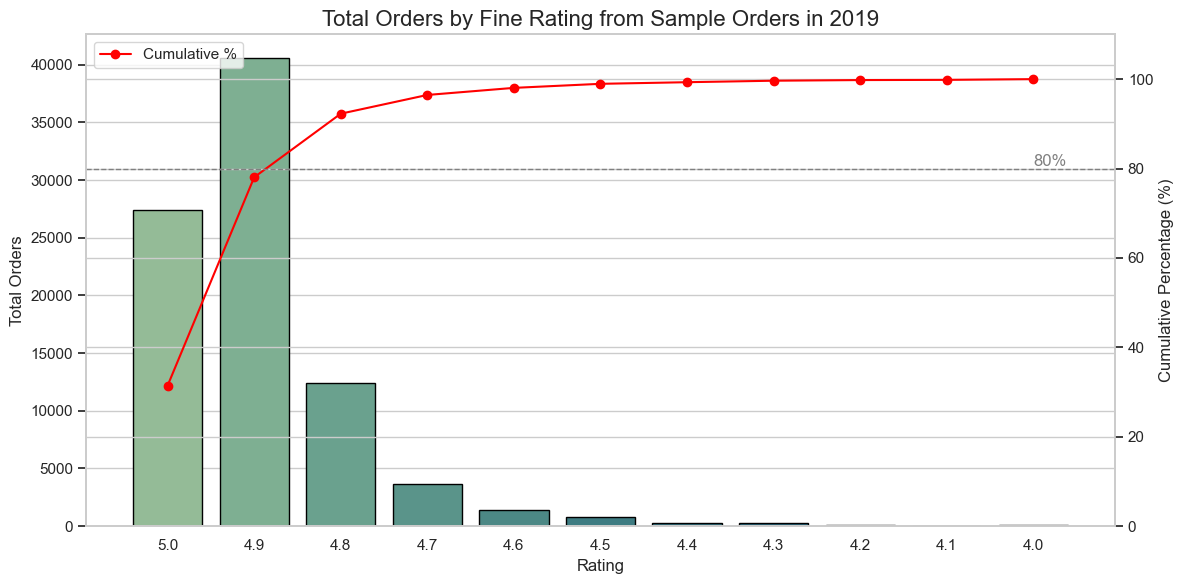

C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_16484\3368001537.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=product_fine_rating_sales.index.astype(str), y=product_fine_rating_sales.values, palette="crest", edgecolor="black", order=product_fine_rating_sales.index.astype(str))


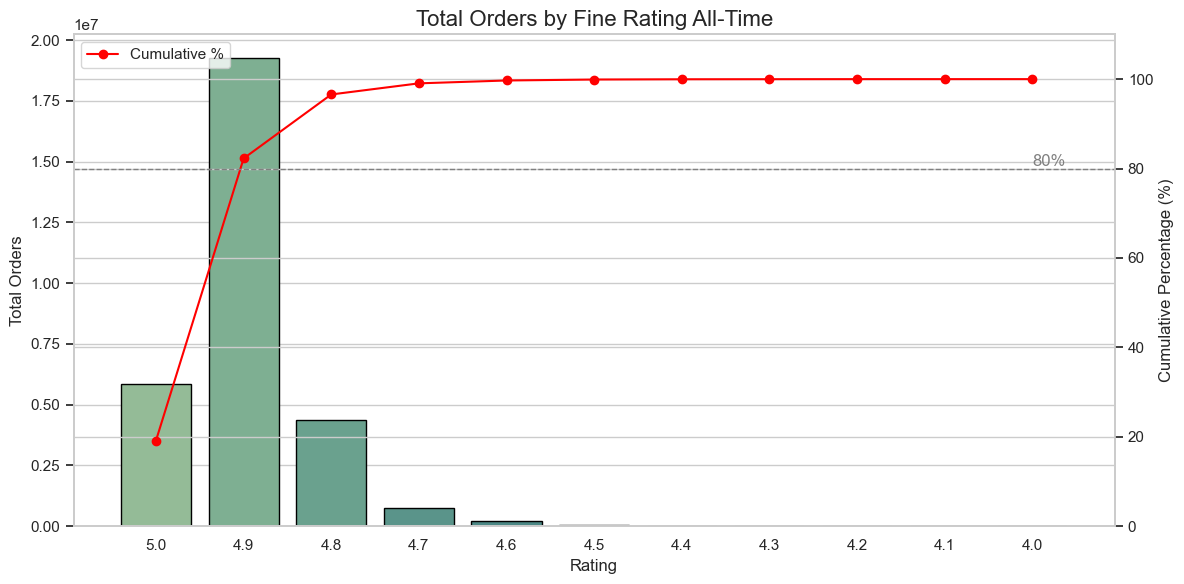

In [27]:
# 2. Finer Rating
fine_rating_sales = orders[orders['item_rating'].between(4.0, 5.0)].groupby('item_rating')['checkout_price'].count()

fine_rating_sales = fine_rating_sales.sort_index(ascending=False)

cumulative_sales = fine_rating_sales.cumsum()
cumulative_percentage = 100 * cumulative_sales / cumulative_sales.iloc[-1]
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x=fine_rating_sales.index.astype(str), y=fine_rating_sales.values, palette="crest", edgecolor="black", order=fine_rating_sales.index.astype(str))
plt.title("Total Orders by Fine Rating from Sample Orders in 2019", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
ax2 = ax1.twinx()
ax2.plot(fine_rating_sales.index.astype(str), cumulative_percentage, color="red", marker="o", linestyle="-", label="Cumulative %")
ax2.set_ylabel("Cumulative Percentage (%)", fontsize=12)
ax2.set_ylim(0, 110)

ax2.axhline(80, color="gray", linestyle="--", linewidth=1)
ax2.text(len(fine_rating_sales) - 1, 80, "80%", color="gray", va="bottom")

ax2.legend(loc="upper left")

plt.tight_layout()
plt.show()


# 4. Plotting the total orders per fine rating bin with Pareto line
product_fine_rating_sales = products[products['item_rating'].between(4.0, 5.0)].groupby('item_rating')['total_sold'].sum()
product_fine_rating_sales = product_fine_rating_sales.sort_index(ascending=False)
cumulative_sales = product_fine_rating_sales.cumsum()
cumulative_percentage = 100 * cumulative_sales / cumulative_sales.iloc[-1]

plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x=product_fine_rating_sales.index.astype(str), y=product_fine_rating_sales.values, palette="crest", edgecolor="black", order=product_fine_rating_sales.index.astype(str))
plt.title("Total Orders by Fine Rating All-Time", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)

ax2 = ax1.twinx()
ax2.plot(product_fine_rating_sales.index.astype(str), cumulative_percentage, color="red", marker="o", linestyle="-", label="Cumulative %")
ax2.set_ylabel("Cumulative Percentage (%)", fontsize=12)
ax2.set_ylim(0, 110)

ax2.axhline(80, color="gray", linestyle="--", linewidth=1)
ax2.text(len(product_fine_rating_sales) - 1, 80, "80%", color="gray", va="bottom")
ax2.legend(loc="upper left")

plt.tight_layout()
plt.show()


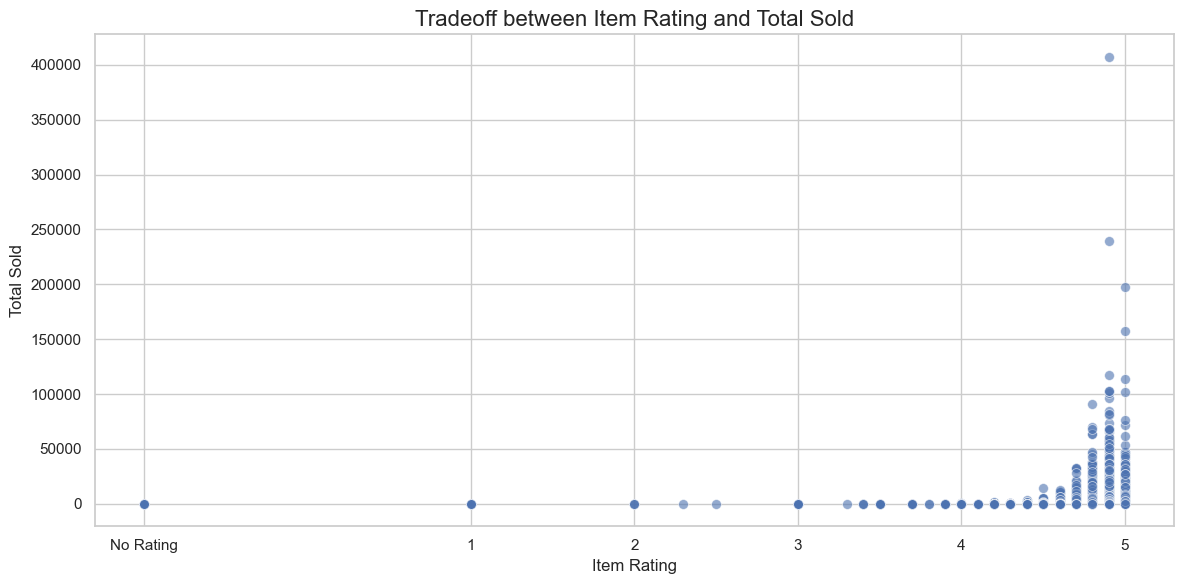

In [28]:
# Scatter plot of item_rating vs. total_sold
plt.figure(figsize=(12, 6))
sns.scatterplot(data=products, x='item_rating', y='total_sold', alpha=0.6, s=50)

# Customizing plot
plt.title("Tradeoff between Item Rating and Total Sold", fontsize=16)
plt.xlabel("Item Rating", fontsize=12)
plt.ylabel("Total Sold", fontsize=12)
plt.grid(True)

# Rename -1 to "No Rating" on the x-axis
plt.xticks([-1, 1, 2, 3, 4, 5], labels=["No Rating", 1, 2, 3, 4, 5])

plt.tight_layout()
plt.show()

## Conclusion on Customer Purchasing Behavior Based on Products

Based on an in-depth analysis of customer purchasing behavior, several key factors shape demand on the platform. These include **Product Demand by Category**, **Price Sensitivity**, **Discount Influence**, and **Rating Impact**. A clear understanding of both high-demand and lower-demand segments provides valuable insights for developing targeted strategies to maximize engagement and drive sales across a diverse customer base.

<br>

---

### Analysis of Customer Purchasing Behavior

#### 1. Product Demand by Category
   - **High-Demand Categories**: Categories such as **fashion (especially men’s and women’s clothes), daily necessities (groceries, health & beauty products), and mobile accessories** drive the majority of sales. These products reflect customer needs for both style and everyday essentials, making them core categories for customer engagement and retention.
   - **Lower-Demand Categories**: Niche categories like **gaming & consoles, automotive, travel & luggage, and tickets & vouchers** see fewer orders, but there is still a consistent, smaller audience interested in these products. These segments may cater to specific interests or one-off purchases and represent opportunities for targeted marketing.

#### 2. Price Sensitivity
   - **Strong Preference for Low-Cost Items**: The majority of orders are concentrated in lower price ranges, with 80% of sales come from the lower end of the pricing spectrum. Customers show a strong preference for affordable products, suggesting a price-sensitive audience that frequently seeks value-for-money.
   - **Demand for Higher-Priced Items**: While limited, there is a segment of customers willing to spend on premium products, particularly in categories like electronics, fashion, and niche segments. This presents an opportunity to capture value-oriented customers who seek quality and exclusivity.

#### 3. Discount Influence
   - **High Impact of Discounts**: Discounts drive 60% of orders, demonstrating that promotions and price reductions are key motivators for purchase decisions. Customers are more likely to buy when they perceive added value through cost savings, underscoring the importance of discount-driven strategies.
   - **Discount Effect on Lower-Demand Items**: Discounting can be an effective way to boost sales for niche or higher-priced items, encouraging trial purchases and increasing exposure for products that might otherwise receive limited attention.

#### 4. Rating Impact
   - **Ratings as a Primary Driver of Sales**: Products with ratings of **4.5 and above** dominate sales, with customers heavily favoring well-rated items. Even small differences near the top end (4.7-5.0) can have a significant impact on demand, indicating that high ratings are seen as a strong indicator of quality and reliability.
   - **Limited Interest in Lower-Rated Products**: Products rated below 4.0 experience minimal demand, suggesting that customers avoid items with low ratings. However, moderately rated items (4.0-4.4) still see some demand, particularly if they fall within price-sensitive or niche categories.

<br>

---

### Strategic Recommendations

#### 1. Marketing Team: Selection of Products for Flash Sales
   - **For New Customers, Focus on High-Demand and Price-Sensitive Items**: Prioritize flash sales for high-demand categories such as **clothing, health & beauty, groceries, and mobile accessories**. These categories align with core customer needs and are more likely to attract high engagement during promotional periods.
   - **For Returning Customers, Segment Flash Sales by Customer Profile**: Use customer segmentation to tailor flash sales. For example, frequent buyers of daily necessities could see flash sales on groceries and household items, while fashion-focused customers receive personalized deals on clothing and accessories. This personalization could increase engagement and conversion rates.
   - **Create ‘Bundles with Purpose’**: Offer bundled products in high-demand categories (e.g., “Self-Care Essentials” combining health, beauty, and fashion items, or “Stay-Connected Kits” with mobile accessories and tech items). Bundling related items can add value for customers and encourage larger purchases.
   - **Gamified Flash Sales and Discounts**: Implement interactive, gamified flash sales where customers can unlock additional discounts or rewards by engaging with the platform (e.g., sharing products, leaving reviews). This approach can make flash sales more engaging and drive additional traffic to the platform.
   - **Tiered Discounts for Higher-Priced Products**: For higher-ticket items, use a tiered discount model to encourage purchases (e.g., 10% off if purchased during the first hour of the flash sale, 5% off afterward). This approach taps into urgency while making premium products more accessible.

#### 2. Quality Assurance Team: Action on Low Ratings
   - **Address Issues in High-Volume, Moderate-Rated Products**: Focus on products with high sales but moderately low ratings (4.0-4.4). Addressing common complaints for these items (e.g., quality or durability issues) can improve ratings, making them more attractive to potential buyers.
   - **Implement a "Rapid Response" Feedback Program**: For products that have experienced a sudden increase in low ratings, initiate a rapid response program where a dedicated team reviews the issue, contacts affected customers, and works with suppliers to make adjustments. This proactive approach can prevent further negative reviews.
   - **Quality Assurance Badging for Improved Products**: For products that have received significant quality upgrades, introduce a “Quality Improved” badge to signal to customers that prior issues have been addressed. This transparency can attract hesitant buyers and rebuild trust in previously low-rated products.
   - **Customer Education on Product Usage**: If low ratings are due to misunderstandings about product use (e.g., tech gadgets, DIY home items), consider creating product guides, videos, or in-app tips to help customers get the most out of their purchases, reducing complaints and returns.
   - **Enhance Quality for Niche Products**: For lower-demand, niche products, addressing quality issues can build loyalty among specialized customer segments. Improving satisfaction in these areas can encourage repeat purchases within smaller, dedicated audiences.

#### 3. Algorithm Engineers: Product Display on Home Page and Search Algorithm
   - **Prioritize Highly Rated, High-Demand Products**: Modify search and homepage algorithms to favor products with ratings of **4.5 and above** in popular categories. This aligns with customer preferences and boosts visibility for trusted, well-reviewed items, likely enhancing conversion rates.
   - **Integrate Price Sensitivity into Recommendations**: Display affordable, well-rated items prominently for customers who historically prefer low-cost purchases, while occasionally highlighting premium items with positive ratings for value-oriented customers.
   - **Dynamic Sorting for Discounted Items**: Adjust the algorithm to dynamically prioritize discounted products when active promotions are running. This ensures that price-sensitive customers see relevant discounts first, maximizing engagement during promotional events.
   - **Balanced Display of Niche Products**: To increase the visibility of lower-demand products, integrate a diverse selection of niche items in personalized recommendations, particularly for customers who have shown interest in specialized categories (e.g., gaming, travel).
   - **Context-Aware Algorithm Adjustments**: Adjust product displays based on time, season, and customer behavior. For example, show more seasonal products (e.g., summer fashion or winter gear) and daily essentials during specific periods. Context-aware displays create a timely and relevant experience for customers.
   - **Personalized Rating-Based Recommendations**: Integrate an algorithmic filter that considers individual customer behavior. If a customer frequently buys 4.0-4.4 rated products in specific categories, display similar rating ranges prominently, while highlighting top-rated items for customers who typically purchase 4.5+ products.
   - **Feature Newly Improved Products with Higher Visibility**: When products receive an upgrade or have addressed quality issues, give them a temporary boost in visibility on the homepage or search results with an “Improved Quality” label. This approach can reignite interest in products that may have seen demand drops due to prior issues.
   - **Explore an “Explore New Products” Carousel**: Implement a rotating carousel on the homepage showcasing new, unrated, or niche products that might otherwise lack exposure. This can encourage discovery among customers who are open to trying something new and different.


#### 4. Brand and Deals Team: Exclusive Partnerships and Promotions

   - **Identify High-Demand Brands for Exclusive Deals**: Use sales and engagement data to identify top-performing brands within high-demand categories (such as clothing, beauty, and mobile accessories). Forge exclusive partnerships with these brands to offer special deals, early access to new products, or limited-edition items to boost exclusivity and appeal.
   - **Create Exclusive Product Lines**: Collaborate with popular brands to develop exclusive product lines or bundles that are only available on the platform. This can enhance the platform’s uniqueness and encourage customers to choose it over competitors for exclusive items.
   - **Offer Co-Branded Promotions with Popular Brands**: For flash sales, work with popular brands to offer co-branded promotions, such as bundled deals, free gifts with purchase, or loyalty points for branded purchases. These types of deals can attract brand-loyal customers and deepen their engagement with the platform.
   - **Launch Brand-Led Campaigns Based on Rating and Sales Data**: Feature top-rated, high-demand brands in curated campaigns (e.g., “Top-Rated Brands Week” or “Best-Sellers by [Brand]”). Use positive reviews and sales success stories to market these brands as quality-driven, increasing customer trust.
   - **Negotiated Discounts for Consistently High-Performing Brands**: Approach brands that consistently perform well on the platform and negotiate exclusive discounts. Highlight these discounts in special campaigns, positioning them as unique offers available only through this platform.

<br>

---

### Summary of Recommendations by Team

- **Marketing**: Tailor flash sales based on customer segments, offer bundles, and use gamification. Experiment with tiered discounts and niche-targeted campaigns.
- **Quality Assurance**: Address quality issues proactively, launch a “Quality Improved” badge, develop educational guides, leverage high-volume buyers for feedback, and automate rating alerts for early intervention.
- **Algorithm Engineers**: Prioritize high-rated items in context, optimize discount displays, introduce personalized rating-based recommendations, feature newly improved products, and showcase new or unrated items for discovery.
- **Brand and Deals**: Partner with high-demand brands to create exclusive offers, limited-edition items, and co-branded campaigns. Negotiate discounts and collaborate on exclusive product lines to build strong brand-driven campaigns that increase customer loyalty.

By implementing these multifaceted recommendations, the platform can enhance customer experience, drive engagement, and maximize sales. This approach leverages data, personalization, quality, and innovation to create a dynamic shopping experience that aligns with customer needs and preferences.

<br>

---

# Customer Demographics Analysis

## Order Volume Based on Age
1. **Highest Engagement Among 25-35 Age Group**:
   - The **25-30** and **30-35** age groups lead with the highest checkout volumes, each surpassing 18,000 checkouts. This indicates that customers in their late 20s to early 30s are the most active demographic on Shopee, showing strong engagement and contributing significantly to overall sales.
   - **20-25** and **35-40** age groups also exhibit high engagement, with over 10,000 checkouts each, suggesting consistent activity from young adults and early middle-aged shoppers.

2. **Moderate Activity in Middle Age Groups (40-55)**:
   - Engagement decreases for the **40-45** and **50-55** age groups, with checkouts ranging from 5,000 to 10,000. This may suggest that middle-aged customers are active but not as engaged as younger demographics.

3. **Lower Engagement from Older Age Groups (55+)**:
   - Shoppers aged **55 and above** (55-60, 60-65, and 65-70) have the lowest checkout numbers, with fewer than 5,000 checkouts each. This suggests lower engagement from older customers, possibly due to less familiarity with online shopping or lower comfort with e-commerce platforms.

## Order Volume Based on Gender

1. **Balanced Gender Distribution**:
   - Shopee’s customer base is nearly evenly split, with **51% of orders from females** and **49% from males**. Both genders actively participate on the platform, indicating a broad appeal across gender lines.

C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_16484\41230412.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = orders_customers.groupby('age_bin')['order_id'].count().reindex(pd.IntervalIndex.from_breaks(age_bins), fill_value=0)
C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_16484\41230412.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_sales.index.astype(str), y=age_sales.values, palette="crest", edgecolor="black")


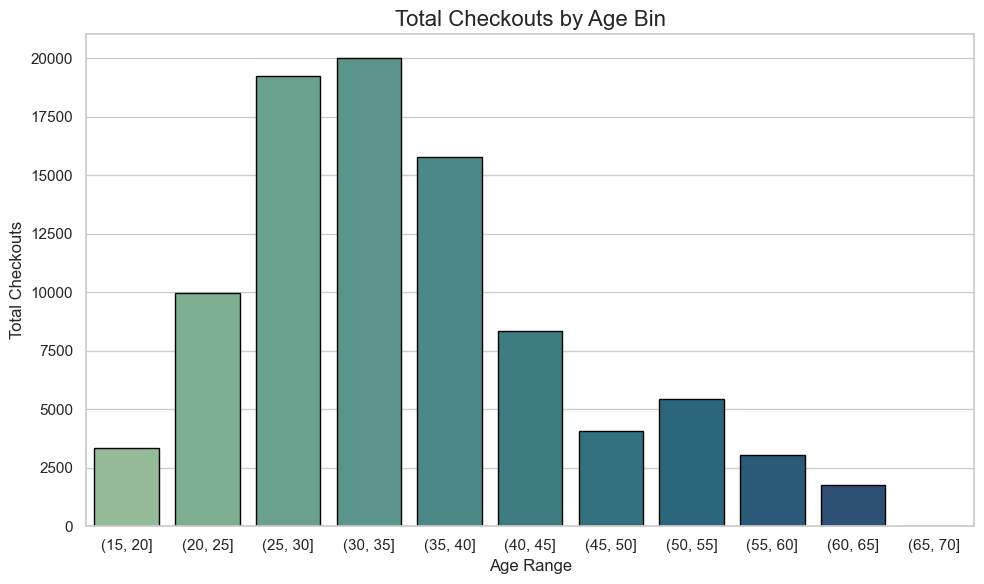

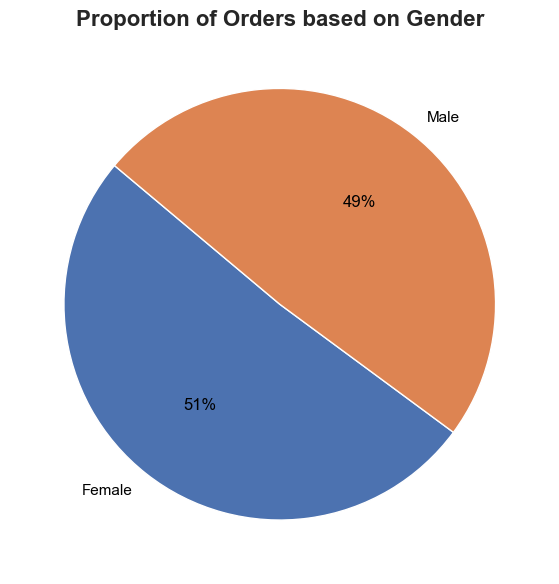

In [29]:
# Define age bins
age_bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
# Bin the age data
orders_customers['age_bin'] = pd.cut(orders_customers['age'], bins=age_bins)
# Group by age bins and count the number of checkouts in each bin
age_sales = orders_customers.groupby('age_bin')['order_id'].count().reindex(pd.IntervalIndex.from_breaks(age_bins), fill_value=0)


# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x=age_sales.index.astype(str), y=age_sales.values, palette="crest", edgecolor="black")
plt.title("Total Checkouts by Age Bin", fontsize=16)
plt.xlabel("Age Range", fontsize=12)
plt.ylabel("Total Checkouts", fontsize=12)
plt.tight_layout()
plt.show()

# 1. Proportion of clients using discounts
plt.figure(figsize=(6, 6))
by_gender = orders_customers['gender'].value_counts()
plt.pie(by_gender, labels=by_gender.index, autopct='%1.0f%%', startangle=140,
        textprops={'color': 'black'}, wedgeprops={'edgecolor': 'white'})

# Adding the title
plt.title("Proportion of Orders based on Gender", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

## Analysis of Revenue by Age and Gender

**1. Highest Revenue-Generating Segments**:
   - The **25-30** age group generates the highest revenue overall, with females generating **$453,015** and males **$371,508**. This age group is likely the most active in purchasing, possibly due to higher disposable income and a stronger inclination toward online shopping.
   - The **30-35** age group also shows high revenue, with females contributing **$419,192** and males **$393,163**. These two age groups are the key drivers of revenue in this dataset.

**2. Mid-Level Revenue Segments**:
   - The **20-25** and **35-40** age groups contribute moderately high revenue. For the **20-25** group, females generate **$230,007**, while males contribute **$209,235**. In the **35-40** group, females generate **$357,011** and males **$299,582**.
   - These age groups may represent younger adults establishing purchasing habits and mid-career professionals with more disposable income.

**3. Lower Revenue Contribution in Older Age Groups**:
   - Revenue contributions decline significantly in older age brackets, particularly from **45 and above**. The **50-55** age group shows a decline, with females generating **$82,142** and males **$133,977**. This downward trend continues into the **55-60** and **60-65** age groups, with minimal contributions.
   - These age segments may engage less in online shopping or have lower discretionary spending, although they still represent a notable part of the customer base.

**4. Gender-Based Revenue Trends**:
   - Across the most active age groups, **females tend to generate higher revenue** than males, especially in the **25-30** and **30-35** age groups. This trend might indicate higher engagement or a higher purchase frequency among female customers, likely influenced by categories like fashion, beauty, and lifestyle products.
   - In the older age groups, males contribute slightly more than females, suggesting a shift in purchasing behavior and product preferences.

---

### Key Takeaways

- **Core Demographic**: The **25-35 age range**, especially females, represents the highest revenue-generating demographic. This group likely has both purchasing power and frequent engagement with online shopping.
- **Opportunity in Younger and Mid-Career Segments**: The **20-25** and **35-40** segments contribute significantly, suggesting potential for targeted promotions to further increase engagement.
- **Older Demographics as Emerging Markets**: Although revenue decreases significantly in the 45+ age groups, these demographics still play an essential role. Targeted campaigns might unlock additional revenue potential from these customers.

---

### Recommendations

#### 1. Marketing Strategies
   - **Focus on 25-35 Age Group**: Design marketing campaigns focused on the 25-35 age range, especially for females, promoting popular categories like fashion, beauty, and electronics.
   - **Increase Engagement for 20-25 and 35-40 Age Groups**: Personalized promotions on trending categories like lifestyle and tech products might help engage these segments.
   - **Develop Campaigns for Older Age Groups**: For customers 45+, create campaigns around products aligned with their interests, such as wellness, home, and leisure. Offering accessible support and educational resources might enhance their experience.

#### 2. Product Selection and Promotion
   - **Emphasize Gender-Specific Products**: Highlight categories such as fashion and lifestyle for females, especially in the younger segments, while promoting products like home improvement and tech gadgets for males in older age brackets.
   - **Seasonal and Occasion-Based Promotions**: Run seasonal promotions for the core demographic (25-35) and consider holiday or event-driven promotions for older demographics.

#### 3. Personalization and Customer Experience
   - **Personalized Product Recommendations**: Use age and gender data to tailor recommendations, with trending items for younger customers and more practical, lifestyle-oriented suggestions for older users.
   - **Improve Experience for Older Demographics**: Simplify navigation and provide easy-to-understand product information for older customers. Consider customer support with a focus on assistance for this demographic.

#### 4. Data-Driven Insights and Feedback Loops
   - **Collect Feedback from High-Revenue Segments**: Capture feedback from the 25-35 age group to fine-tune marketing strategies and understand product preferences.
   - **Track Trends in Lower Revenue Segments**: Monitor trends within the 45+ age groups for any rising interest in specific categories, adjusting marketing efforts accordingly.


C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_16484\4166481798.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_revenue = orders_customers.groupby(['age_bin', 'gender'])['checkout_price'].sum().unstack(fill_value=0)


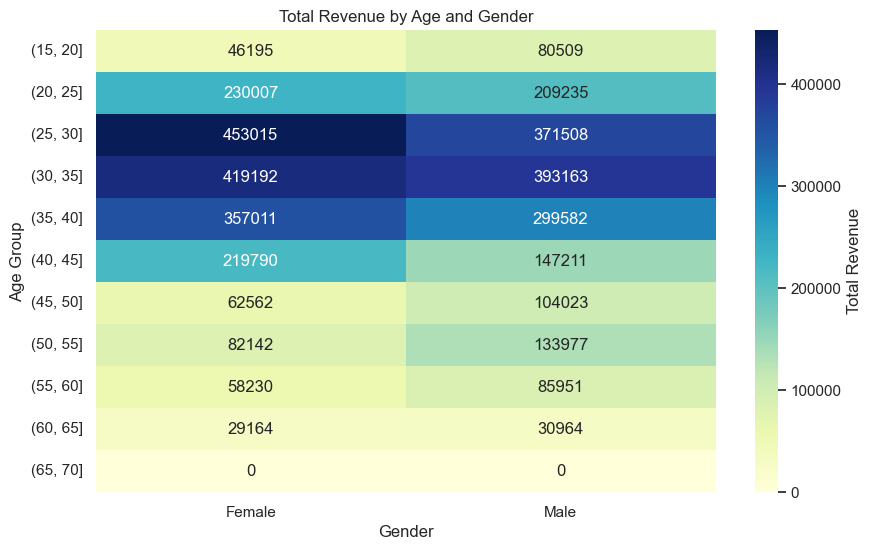

In [30]:
# Calculate total revenue per age bin and gender
age_gender_revenue = orders_customers.groupby(['age_bin', 'gender'])['checkout_price'].sum().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(age_gender_revenue, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Total Revenue'})
plt.title('Total Revenue by Age and Gender')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.show()

# Overview on Individual Customers
## Making Customer Metrics

### 1. **Total Spending**
   - **Description**: The total amount each customer has spent over all their purchases.
   - **Purpose**: Helps identify high-value customers and their overall contribution to revenue.

### 2. **Average Order Value**
   - **Description**: The average amount spent per order, calculated as total spending divided by checkout count over the last year.
   - **Purpose**: Indicates the typical spending level per transaction, useful for segmenting customers based on their purchasing power.

### 3. **Campaign Count**
   - **Description**: The total number of unique campaign days a customer has participated in.
   - **Purpose**: Measures engagement with promotional campaigns, allowing Shopee to identify customers responsive to promotions.

### 4. **Average Order Per Month**
   - **Description**: The average number of orders placed per month, based on the checkout count over the last year.
   - **Purpose**: Indicates purchase frequency on a monthly basis, helping to identify regular buyers versus occasional shoppers.

### 5. **Average Discount Percentage**
   - **Description**: The average discount percentage a customer receives across all orders.
   - **Purpose**: Shows sensitivity to discounts, allowing Shopee to tailor marketing efforts based on discount preferences.

### 6. **Percentage of Items Discounted**
   - **Description**: The percentage of a customer’s orders that include a discount.
   - **Purpose**: Measures how often a customer purchases discounted items, useful for identifying price-sensitive customers.

### 7. **Average Purchase Frequency**
   - **Description**: The average number of days between purchases for each customer.
   - **Purpose**: Provides insights into purchasing intervals, enabling predictions of when customers might buy again and identifying high-frequency shoppers.

### 8. **Product Variety**
   - **Description**: The number of unique product categories a customer has purchased from.
   - **Purpose**: Indicates diversity in purchasing behavior, with higher variety suggesting broader interests.

### 9. **Checkout Count Last 1 Year**
   - **Description**: The total number of checkouts a customer has made in the past year.
   - **Purpose**: Shows the overall engagement level with the platform, helping in identifying loyal customers.

### 10. **Last Checkout Day**
   - **Description**: The number of days since the customer’s last checkout.
   - **Purpose**: Helps identify dormant customers who may need re-engagement strategies.

### 11. **Last Login Day**
   - **Description**: The number of days since the customer last logged into the platform.
   - **Purpose**: Indicates customer engagement and platform activity, with recent logins suggesting active users.

### 12. **Login Count (Last 10 Days & Last 60 Days)**
   - **Description**: The number of times a customer logged in during the last 10 and 60 days.
   - **Purpose**: Shows recent engagement trends, helping to identify users who are becoming more or less active over time.

In [31]:
# Merge products into orders to include product details in each order
orders_products_merged = orders.copy()


### PURCHASE VALUE PER ORDER METRIC ###
# Calculate total purchase value using the actual price paid
orders_products_merged['total_spending'] = orders_products_merged['checkout_price']
# Group by customer_id to sum up the total purchase value for each customer
total_purchase_value = orders_products_merged.groupby('customer_id')['total_spending'].sum().reset_index()
# Merge total_purchase_value with customer data to get checkout count
total_purchase_value = pd.merge(total_purchase_value, customers[['customer_id', 'checkout_count_last_1_year']], on='customer_id', how='left')
# Calculate the average purchase value per order for each customer
total_purchase_value['average_order_value'] = total_purchase_value['total_spending']/total_purchase_value['checkout_count_last_1_year']
total_purchase_value.loc[total_purchase_value['checkout_count_last_1_year'] == 0, 'average_order_value'] = 0



### CAMPAIGN COUNT ###
# Filter the rows where 'is_campaign' is True
campaign_orders = orders_products_merged[orders_products_merged['is_campaign']]
# Group by 'customer_id' and 'order_date' to get unique campaign days
unique_campaign_days = campaign_orders.groupby(['customer_id', 'order_date']).size().reset_index(name='campaign_count')
# Sum the uique campaign days for each customer
campaign_participation = unique_campaign_days.groupby('customer_id')['campaign_count'].count().reset_index()



### AVERAGE ORDER PER MONTH METRIC ###
# Calculate the average purchase per month based on 'checkout_count_last_1_year'
order_count_per_month = customers[['customer_id', 'checkout_count_last_1_year']]
order_count_per_month['average_order_per_month'] = order_count_per_month['checkout_count_last_1_year'] / 12



### AVERAGE DISCOUNT PERCENTAGE METRIC ###
# Calculate the average discount percentage per customer
average_discount = orders_products_merged.groupby('customer_id')['total_discount'].mean().reset_index()
average_discount.rename(columns={'total_discount': 'average_discount_percentage'}, inplace=True)



### DISCOUNTED ITEM PERCENTAGE ###
# Calculate whether each order was discounted
orders_products_merged['is_discounted'] = orders_products_merged['total_discount'] > 0
# Count the number of discounted orders per customer
discounted_count = orders_products_merged.groupby('customer_id')['is_discounted'].sum().reset_index()
discounted_count.columns = ['customer_id', 'discounted_count']
# Calculate the total number of orders (checkouts) per customer
total_checkouts = orders_products_merged.groupby('customer_id')['is_discounted'].count().reset_index()
total_checkouts.columns = ['customer_id', 'total_checkouts']
# Merge to calculate the percentage
discount_sensitivity = pd.merge(discounted_count, total_checkouts, on='customer_id')
discount_sensitivity['percentage_item_discounted'] = (discount_sensitivity['discounted_count'] / discount_sensitivity['total_checkouts']) * 100
# Keep only relevant columns
discount_sensitivity = discount_sensitivity[['customer_id', 'percentage_item_discounted']]



### AVERAGE PURCHASE FREQUENCY METRIC ###
# Calculate the time difference between consecutive orders for each customer
orders_products_merged = orders_products_merged.sort_values(by=['customer_id', 'order_time'])
orders_products_merged['time_diff'] = orders_products_merged.groupby('customer_id')['order_time'].diff().dt.days
# Calculate average purchase frequency per customer
average_purchase_frequency = orders_products_merged.groupby('customer_id')['time_diff'].mean().reset_index()
average_purchase_frequency.columns = ['customer_id', 'average_purchase_frequency']



### PRODUCT VARIETY METRIC ###
# Merge orders with products to get category details for each order
orders_products = orders[['customer_id','product_id', 'main_category']]
# Calculate the number of unique categories each customer has purchased from
product_variety = orders_products.groupby('customer_id')['main_category'].nunique().reset_index()
product_variety.columns = ['customer_id', 'product_variety']



### MERGING ALL INDIVIDUAL METRICS ###
# Merge all metrics into the new customer_metrics DataFrame
customer_metrics = pd.merge(total_purchase_value[['customer_id', 'total_spending','average_order_value']], average_discount, on='customer_id', how='left')
customer_metrics = pd.merge(customer_metrics, campaign_participation, on='customer_id', how='left')
customer_metrics = pd.merge(customer_metrics, discount_sensitivity, on='customer_id', how='left')
customer_metrics = pd.merge(customer_metrics, order_count_per_month[['customer_id', 'average_order_per_month']], on='customer_id', how='left')
customer_metrics = pd.merge(customer_metrics, average_purchase_frequency, on='customer_id', how='left')
customer_metrics = pd.merge(customer_metrics, product_variety, on='customer_id', how='left')
customer_metrics = pd.merge(customer_metrics, customers[['customer_id', 'checkout_count_last_1_year', 'last_checkout_day', 'last_login_day',
                                                         'login_count_last_10_days', 'login_count_last_60_days'
                                                         ]], on='customer_id', how='left')


# Convert the column to integer
customer_metrics['last_checkout_day'] = customer_metrics['last_checkout_day'].astype(int)

C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_16484\2558008184.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_count_per_month['average_order_per_month'] = order_count_per_month['checkout_count_last_1_year'] / 12


In [32]:
customer_metrics['average_purchase_frequency'] = customer_metrics['average_purchase_frequency'].fillna(-1)
customer_metrics['campaign_count'] = customer_metrics['campaign_count'].fillna(0)

In [33]:
customer_metrics.head(5)

,customer_id,total_spending,average_order_value,average_discount_percentage,campaign_count,percentage_item_discounted,average_order_per_month,average_purchase_frequency,product_variety,checkout_count_last_1_year,last_checkout_day,last_login_day,login_count_last_10_days,login_count_last_60_days
0,299,1924.407850,60.137745,24.016767,0.0,59.375000,2.666667,9.709677,15,32,9,1,34,245
1,305,613.394453,51.116204,19.449797,1.0,66.666667,1.000000,22.727273,6,12,78,9,6,43
2,346,1150.701300,22.562771,24.505587,7.0,50.980392,4.250000,6.600000,18,51,0,6,13,89
3,462,8239.889542,31.093923,29.487127,18.0,63.396226,22.083333,0.973485,23,265,0,1,25,131
4,634,152.034455,16.892717,36.953039,1.0,88.888889,0.750000,31.375000,6,9,7,1,12,61


---
## Monitoring Customer Metrics and Establishing Good Values

Effective monitoring of these customer metrics involves regular tracking and defining benchmarks or thresholds for each metric to evaluate customer engagement, spending behavior, and responsiveness to promotions. Here is a breakdown of how to monitor these metrics and suggested monitoring technique that can guide strategic decisions.

### 1. **Total Spending**
   - **Good Value**: Higher total spending is ideal. Identifying and nurturing high-spending customers can increase customer lifetime value (CLV).
   - **Desired Trend**: **Increase**.
   - **Monitoring**: Track total spending growth quarterly and annually per customer. Monitor for consistent increases, and flag any significant drops in spending among regular customers as a potential risk of churn.

### 2. **Average Order Value (AOV)**
   - **Good Value**: Higher AOV indicates higher purchasing power and is desirable as it implies customers are willing to spend more per transaction.
   - **Desired Trend**: **Increase** or at least remain **stable**.
   - **Monitoring**: Track AOV on a monthly and quarterly basis. A downward trend may indicate a shift towards lower-priced items, suggesting an opportunity to encourage bundling or cross-selling.

### 3. **Campaign Count**
   - **Good Value**: Higher campaign count means stronger engagement with promotions, indicating that customers are interested in deals and offers.
   - **Desired Trend**: **Increase** or maintain **high engagement**.
   - **Monitoring**: Track campaign participation across the last 6 months to identify regular participants. Sudden drops in engagement with campaigns from previously active customers could signal reduced interest, prompting re-engagement with targeted campaigns.

### 4. **Average Orders Per Month**
   - **Good Value**: Higher monthly order frequency is desirable as it indicates recurring engagement with the platform.
   - **Desired Trend**: **Increase** or maintain **high consistency**.
   - **Monitoring**: Track changes in monthly frequency over the last 12 months. Declines in regular monthly orders could suggest an opportunity for re-engagement or incentives to drive monthly purchases.

### 5. **Average Discount Percentage**
   - **Good Value**: Stability is generally preferred. High discount usage can indicate discount sensitivity, but extreme increases may reduce overall profit margins.
   - **Desired Trend**: **Stable** or **moderate increase** for discount-sensitive customers.
   - **Monitoring**: Track the average discount percentage each quarter. A high increase could indicate a shift toward more discount-seeking behavior, suggesting the need for balancing promotions with profitability.

### 6. **Percentage of Items Discounted**
   - **Good Value**: Stability or moderate increase, particularly for discount-sensitive customers. Higher values mean a customer is very discount-driven, but for profitability, this should ideally not be excessive.
   - **Desired Trend**: **Stable** or **moderate increase** for high discount-seekers.
   - **Monitoring**: Track quarterly to observe discount usage trends. Rising trends among high-value customers could warrant offering exclusive deals without compromising on margins.

### 7. **Average Purchase Frequency**
   - **Good Value**: Higher frequency (shorter intervals between purchases) is ideal, as it indicates strong repeat engagement.
   - **Desired Trend**: **Increase** (decrease in days between purchases).
   - **Monitoring**: Track purchase frequency every month. Any lengthening of the purchase interval for regular customers may indicate reduced engagement, suggesting they may need a reminder or offer to re-engage.

### 8. **Product Variety**
   - **Good Value**: Higher product variety indicates a customer with broad interests who is likely to stay engaged. This could also imply a higher likelihood of cross-selling opportunities.
   - **Desired Trend**: **Increase** in variety.
   - **Monitoring**: Monitor product variety annually. If variety decreases, it may suggest a narrowing of interests or a reduction in engagement, which could benefit from exposure to new product categories.

### 9. **Checkout Count Last 1 Year**
   - **Good Value**: A high checkout count over the year indicates loyalty and regular platform engagement.
   - **Desired Trend**: **Increase**.
   - **Monitoring**: Track on an annual basis and compare with previous years to assess customer loyalty trends. A drop in checkout counts among loyal customers may signal potential churn risk.

### 10. **Last Checkout Day**
   - **Good Value**: The fewer days since the last checkout, the better, as it implies recent engagement.
   - **Desired Trend**: **Decrease** (fewer days since last checkout).
   - **Monitoring**: Monitor weekly for high-value or loyal customers. An increasing trend in days since last checkout may indicate declining engagement, which may require a targeted promotion to encourage a return purchase.

### 11. **Last Login Day**
   - **Good Value**: Similar to the checkout metric, the fewer days since the last login, the better, as it reflects recent engagement with the platform.
   - **Desired Trend**: **Decrease**.
   - **Monitoring**: Monitor weekly to identify inactive customers. Rising values among regular or high-value customers can prompt targeted re-engagement strategies.

### 12. **Login Count (Last 10 Days & Last 60 Days)**
   - **Good Value**: A high login count in recent periods (last 10 days and last 60 days) indicates strong engagement with the platform.
   - **Desired Trend**: **Increase**.
   - **Monitoring**: Track these values monthly to detect any early signs of disengagement. Decreasing login counts may suggest waning interest, particularly for customers who were previously active, and may warrant re-engagement efforts.


### Additional Monitoring Strategies

1. **Set Alerts for Key Changes**: Set up automated alerts for significant drops or increases in core metrics, especially for high-value customers (e.g., a sudden increase in days since last checkout, significant drops in purchase frequency, or last login).

2. **Track Growth and Decline Patterns**: Use dashboards to regularly track metrics that should ideally increase (e.g., total spending, AOV, frequency) and those that should be stable or moderately increase (e.g., discount-related metrics). This will help in quickly identifying customer behavior shifts.

3. **Implement Cohort Analysis**: Analyze customer cohorts based on similar metrics (e.g., high-frequency buyers, high AOV customers) to identify changes in engagement and spending habits within each cohort. This can help in creating tailored engagement strategies.

4. **Benchmark and Compare with Industry Standards**: Whenever possible, benchmark these metrics against industry averages to understand if the platform’s performance is competitive. High AOV, purchase frequency, and engagement with promotions are typically good indicators of platform health relative to competitors.

5. **Annual Review of Desired Value Ranges**: At least once a year, review the desired value ranges and thresholds for each metric to ensure they align with business goals, customer behavior changes, and industry trends.

By monitoring these metrics with these goals and trends in mind, Shopee can better identify and nurture high-value customers, engage price-sensitive users effectively, and prevent customer churn, ultimately driving sustainable growth and customer satisfaction.


<br>

---

## Descriptive Customer Metrics for Shopee in 2019

#### 1. **Total Spending**
   - **Mean**: $1,665.59
   - **Median (50%)**: $235.05
   - **Max**: $173,478.20
   - **Interpretation**: There’s a high variability in total spending, with a significant difference between the mean and median, indicating a small number of high-spending customers skewing the average. The majority of customers have a relatively low total spend, with 75% spending less than $1,006.41. This suggests that most customers are occasional buyers with modest spending, while a few high-spenders are driving the higher average.

#### 2. **Average Order Value (AOV)**
   - **Mean**: $41.17
   - **Median**: $22.24
   - **Max**: $1,178.34
   - **Interpretation**: The mean AOV is $41.17, but the median is $22.24, indicating that while some customers make high-value purchases, the typical order is much lower. This again shows a skewed distribution, with the majority of customers making smaller purchases.
   - **Insights from Visuals**: The log-transformed AOV shows a positively skewed distribution, where most customers’ AOV is relatively low, but a small subset has higher spending per order.

#### 3. **Average Discount Percentage**
   - **Mean**: 28.58%
   - **Median**: 28.34%
   - **Interpretation**: Most customers receive an average discount of around 28%. The consistency between mean and median suggests a relatively normal distribution for discount percentages, with most customers receiving moderate discounts.
   - **Insights from Visuals**: Most customers fall within the 20-40% range for average discounts, with a steady cumulative increase.

#### 4. **Campaign Count**
   - **Mean**: 2.64
   - **Median**: 1
   - **Max**: 20
   - **Interpretation**: Campaign participation is generally low, with the median indicating that most customers participate in only one campaign per year. A small group of highly engaged customers (top 25%) participates in three or more campaigns, suggesting potential for greater campaign engagement among the broader customer base.
   - **Insights from Visuals**: The campaign count distribution is heavily skewed to the left, with most customers participating in fewer than 5 campaigns. The cumulative line also rises sharply, indicating that only a few customers are highly engaged with campaigns.

#### 5. **Percentage of Items Discounted**
   - **Mean**: 59.03%
   - **Median**: 60.00%
   - **Interpretation**: The median and mean values are close, suggesting a balanced distribution with most customers purchasing discounted items around 60% of the time. This indicates a strong preference for discounted items among the majority of customers, reflecting high price sensitivity.
   - **Insights from Visuals**: The distribution here is fairly even, with a slight skew toward higher discount percentages. The cumulative curve is gradual, showing a mix of low to high discount sensitivity among customers.

#### 6. **Average Orders Per Month**
   - **Mean**: 3.31
   - **Median**: 0.83
   - **Max**: 348.33
   - **Interpretation**: The large gap between the mean and median indicates a few high-frequency buyers skewing the average. Most customers place less than one order per month, with 75% placing fewer than two orders monthly, highlighting a need to increase purchase frequency among the majority.

#### 7. **Average Purchase Frequency (Days between Purchases)**
   - **Mean**: 27.60 days
   - **Median**: 20.53 days
   - **Interpretation**: The median of 20.53 days suggests that a significant number of customers make a purchase approximately every three weeks, though the mean is slightly higher due to customers with longer gaps between purchases.
   - **Insights from Visuals**: The distribution shows a steep drop, indicating that the majority of customers purchase infrequently, with cumulative data showing a rapid plateau.

#### 8. **Product Variety**
   - **Mean**: 8.51 categories
   - **Median**: 7 categories
   - **Interpretation**: Most customers purchase from around 7-9 categories. This suggests some level of product variety in customer purchases, but there may be opportunities to encourage more cross-category purchases to increase product variety.
   - **Insights from Visuals**: The distribution is relatively broad, with many customers purchasing across 4-12 categories, though the cumulative curve flattens at higher variety levels.

#### 9. **Checkout Count Last 1 Year**
   - **Mean**: 39.71 checkouts
   - **Median**: 10 checkouts
   - **Max**: 4,180 checkouts
   - **Interpretation**: The mean is much higher than the median, indicating a small number of very frequent buyers. The majority of customers have lower checkout counts, with 75% having fewer than 22 checkouts per year.
   - **Insights from Visuals**: The log-transformed distribution reveals a heavy skew toward lower checkout counts, with most customers having fewer than 8 checkouts. The cumulative line shows that about 80% of customers have relatively few checkouts, confirming low engagement among a majority.

#### 10. **Last Checkout Day**
   - **Mean**: 100.00 days since last checkout
   - **Median**: 68 days
   - **Interpretation**: Many customers have not made a recent purchase, with a median of over two months since the last checkout. This suggests potential churn among a significant portion of the customer base, warranting re-engagement efforts.
   - **Insights from Visuals**: This metric is skewed, with a significant portion of customers having high last checkout day counts, indicating they haven't made recent purchases.

#### 11. **Login Count (Last 10 Days & Last 60 Days)**
   - **Last 10 Days**: 
      - **Mean**: 4.42, **Median**: 1
   - **Last 60 Days**:
      - **Mean**: 25.26, **Median**: 7
   - **Interpretation**: The median login counts in both periods are relatively low, suggesting that a majority of customers are not logging in frequently. However, the higher mean values indicate that a smaller subset of customers logs in very often.
   - **Insights from Visuals**: The log-transformed login count shows a similar skew to checkout and purchase frequency metrics, with most customers logging in infrequently.


<br>

---

In [34]:
# 1. Descriptive Statistics
print("\nDescriptive Statistics:")
print(customer_metrics.describe())


Descriptive Statistics:
         customer_id  total_spending  average_order_value  \
count    2295.000000     2295.000000          2295.000000   
mean    77331.616558     1665.588899            41.170839   
std     32695.535858     7678.373335            70.954291   
min       299.000000        0.093424             0.000000   
25%     52784.000000       59.599275            10.260148   
50%     81472.000000      235.053781            22.241895   
75%    106765.500000     1006.409015            45.154992   
max    127901.000000   173478.199758          1178.342478   

       average_discount_percentage  campaign_count  \
count                  2295.000000     2295.000000   
mean                     28.583544        2.642702   
std                      13.141886        3.941321   
min                       0.000000        0.000000   
25%                      22.094194        0.000000   
50%                      28.337191        1.000000   
75%                      34.388308        3.000

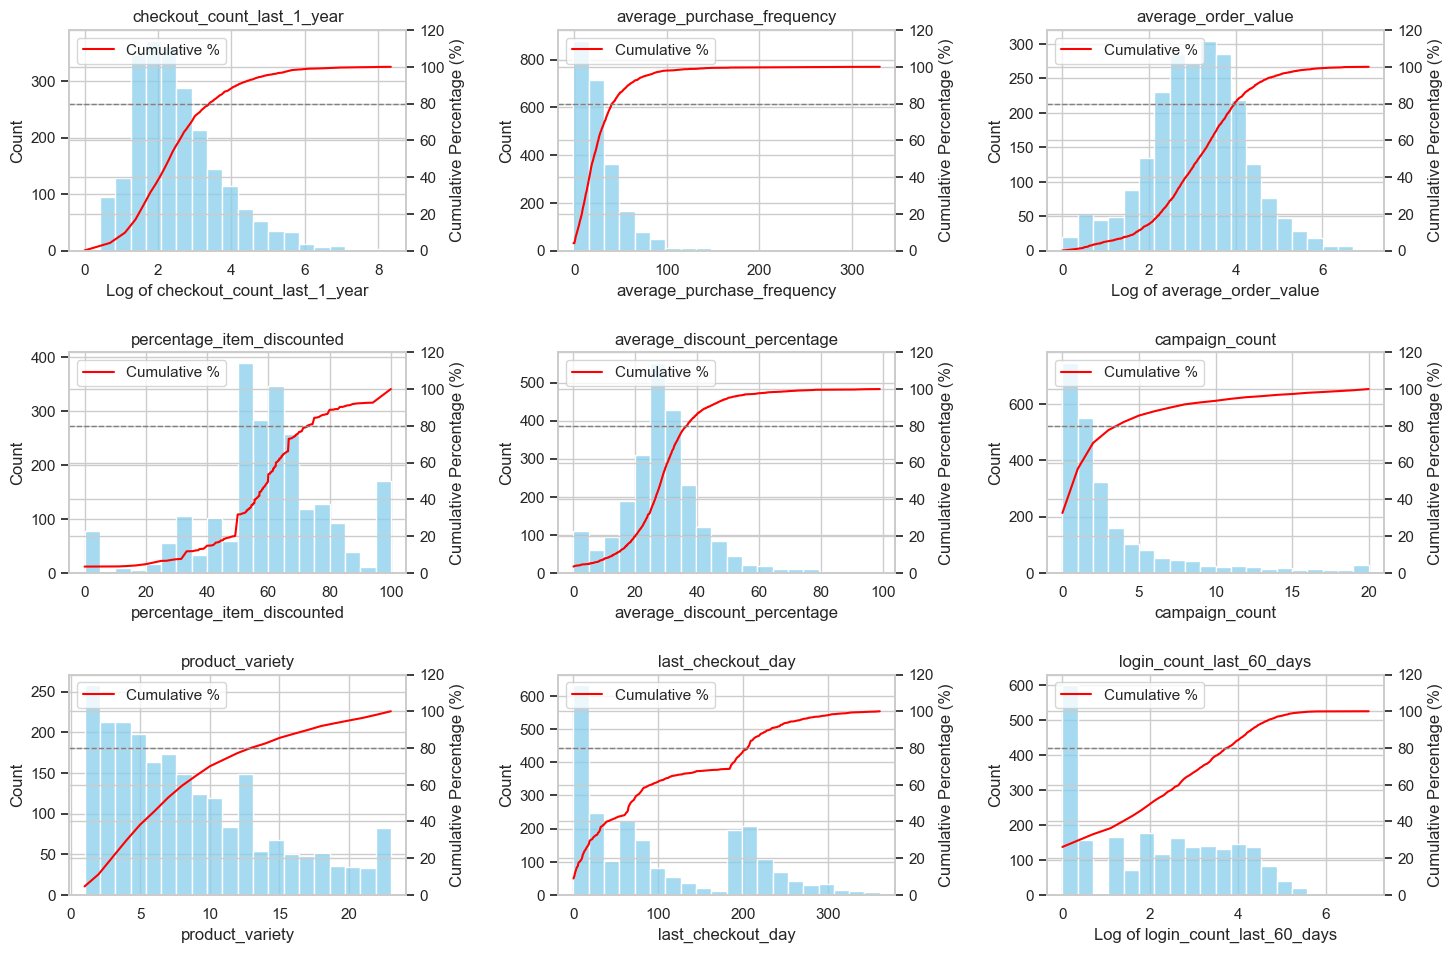

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of columns for metrics and specify columns for log transformation
metrics_columns = ['checkout_count_last_1_year', 'average_purchase_frequency',
                   'average_order_value', 'percentage_item_discounted', 'average_discount_percentage',  
                   'campaign_count', 'product_variety', 'last_checkout_day', 'login_count_last_60_days']

log_transform_columns = ['checkout_count_last_1_year', 'average_order_value', 'login_count_last_60_days']

plt.figure(figsize=(15, 10))

for i, column in enumerate(metrics_columns, 1):
    plt.subplot(3, 3, i)
    
    # Apply log transformation if the column is in the specified list
    if column in log_transform_columns:
        data = np.log1p(customer_metrics[column].dropna())  # log1p adds 1 to avoid log(0)
        xlabel = f'Log of {column}'
    else:
        data = customer_metrics[column].dropna()
        xlabel = column

    # Plot histogram
    sns.histplot(data, bins=20, color='skyblue')
    plt.title(column)
    plt.xlabel(xlabel)
    
    # Calculate value counts and cumulative percentage for the transformed data
    value_counts = data.value_counts().sort_index()
    cumulative = value_counts.cumsum() / value_counts.sum() * 100  # Convert to cumulative percentage
    
    # Plot Pareto line on secondary y-axis
    ax2 = plt.gca().twinx()
    ax2.plot(value_counts.index, cumulative, color='red', marker='', linestyle='-', markersize=3, label='Cumulative %')
    ax2.set_ylim([0, 120])
    ax2.set_ylabel('Cumulative Percentage (%)')
    ax2.axhline(80, color='gray', linestyle='--', linewidth=1)  # Optional: line at 80%
    
    # Add legend for Pareto line
    ax2.legend(loc='upper left')

plt.tight_layout(pad=2.0)
plt.show()

---

## Analysis on Campaign Presence 

1. **Campaign Awareness Among Customers**:
   - With **67.5% of customers having participated in at least one campaign**, it’s clear that the presence of campaigns has reached a significant portion of the customer base. This suggests that more than half of the customers are aware of and willing to engage with Shopee’s promotional campaigns.

2. **Potential for Increased Engagement**:
   - **32.5% of customers have not participated in any campaigns**, indicating an opportunity to increase engagement with this segment. This group might not be fully aware of the benefits or offerings of campaigns or may require additional incentives or tailored campaigns to encourage their participation.

3. **Opportunity to Enhance Campaign Appeal**:
   - Understanding why some customers haven’t participated can provide insights for Shopee to make campaigns more attractive and accessible. Tailoring campaigns to the interests or needs of different segments, especially for non-participants, could improve their overall appeal.

<br>

---

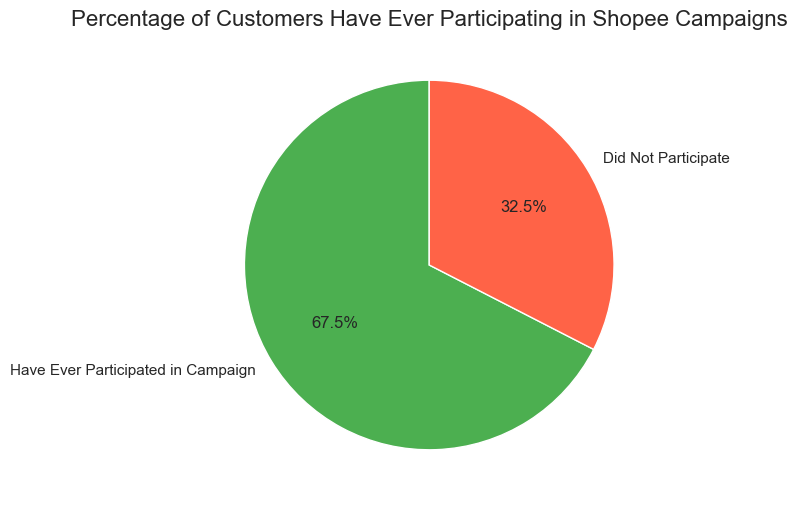

In [36]:
# Group by customer_id and calculate if each customer has participated in a campaign (max of is_campaign per customer)
customer_campaign = orders.groupby('customer_id')['is_campaign'].max()

# Calculate total unique customers and unique customers who participated in campaigns
total_customers = customer_campaign.count()
campaign_customers = customer_campaign[customer_campaign == 1].count()

# Calculate participation percentage
participation_rate = (campaign_customers / total_customers) * 100
non_participation_rate = 100 - participation_rate

# Plotting the result as a pie chart
plt.figure(figsize=(8, 6))
plt.pie([participation_rate, non_participation_rate], labels=["Have Ever Participated in Campaign", "Did Not Participate"], autopct="%.1f%%", startangle=90, colors=["#4CAF50", "#FF6347"])
plt.title("Percentage of Customers Have Ever Participating in Shopee Campaigns", fontsize=16)
plt.show()

---

## Analysis of Shopee’s Current Customer Metrics

Based on the analysis of Shopee’s customer metrics, including campaign participation, spending patterns, frequency of purchases, and engagement with discounts, we can assess strengths, areas for improvement, potential solutions, and necessary stakeholders.

### **1. Strengths in Current Metrics**

**A. High Discount Engagement and Price Sensitivity**
   - **What’s Good**: Shopee’s customer base shows strong engagement with discounts, with around 60% of items being discounted and an average discount percentage of approximately 28%. This indicates that the discount strategies are reaching the intended audience effectively.
   - **Why It’s Effective**: The high engagement with discounted items demonstrates that price sensitivity is well understood, and the discount strategies align with customer preferences.
   - **Recommendation**: Maintain a balance of moderate discounts to sustain engagement without sacrificing profitability. Occasional flash sales with larger discounts can stimulate additional engagement and excitement.

**B. Campaign Awareness and Participation**
   - **What’s Good**: With 67.5% of customers having participated in at least one campaign, Shopee has successfully raised awareness of its promotional campaigns. This level of engagement suggests that campaigns are visible to a majority of the user base.
   - **Why It’s Effective**: High campaign awareness is crucial for customer engagement and sales, as campaigns drive short-term traffic and can convert browsing customers into buyers.
   - **Recommendation**: Continue promoting campaigns effectively and monitor participation trends over time to maintain or increase this percentage.

**C. Strong Diversity in Product Variety**
   - **What’s Good**: With a mean of 8.5 categories per customer, Shopee’s customers are exploring a wide variety of products. This reflects the platform’s success in offering a broad product range and encouraging cross-category purchases.
   - **Why It’s Effective**: Higher product variety per customer indicates greater engagement across categories, which can increase overall spending and customer retention.
   - **Recommendation**: Maintain this variety and consider cross-selling strategies, such as bundling complementary products or personalized product recommendations to encourage even broader exploration.

### **2. Areas for Improvement**

**A. Low Average Order Value (AOV)**
   - **What Needs Improvement**: The average order value (AOV) is relatively low, with a mean of $41.17 and a median of $22.24. This suggests that while customers are purchasing, they are often making smaller, lower-value transactions.
   - **Improvement Strategy**:
     - **Increase Basket Size**: Encourage larger orders through bundling offers, minimum purchase discounts (e.g., “Save $10 on orders over $50”), or free shipping thresholds.
     - **Cross-Selling and Upselling**: Highlight complementary items during checkout to increase the total order value.
   - **Stakeholders Involved**: Marketing Team (for creating bundle offers), Product Team (to improve the recommendation engine for cross-sell/upsell), and UX/UI Team (to display upsell items prominently at checkout).

**B. Infrequent Purchase Frequency**
   - **What Needs Improvement**: The average purchase frequency indicates that many customers are infrequent buyers, with a median of 20 days between purchases. A significant portion of the customer base has long intervals between transactions, indicating room to encourage repeat buying.
   - **Improvement Strategy**:
     - **Introduce Loyalty Programs**: Create loyalty programs or reward systems that incentivize frequent purchases, such as offering discounts or points that accumulate with each purchase and can be redeemed for future discounts.
     - **Regular Re-Engagement Campaigns**: Send reminders or personalized product recommendations to customers after a certain period of inactivity (e.g., after 20 days without a purchase).
   - **Stakeholders Involved**: Marketing Team (for loyalty program design), CRM/Customer Engagement Team (for sending automated re-engagement messages), and Data Analytics Team (to monitor purchase frequency and test re-engagement effectiveness).

**C. Low Campaign Participation Among One-Third of Customers**
   - **What Needs Improvement**: While a majority of customers have participated in campaigns, 32.5% have not engaged with any promotions. This segment represents an untapped opportunity.
   - **Improvement Strategy**:
     - **Educational and Awareness Campaigns**: Implement campaigns that educate non-participants on the benefits of engaging with promotions and offer first-time participation incentives.
     - **Targeted Campaigns Based on Purchase History**: Use customer data to create personalized, highly relevant campaigns that appeal to the specific preferences of non-participating customers.
   - **Stakeholders Involved**: Marketing Team (to design tailored campaigns), Data Analytics Team (to segment customers and personalize campaigns), and CRM/Customer Engagement Team (for targeted messaging and outreach).

**D. High Inactivity for Last Checkout and Login Days**
   - **What Needs Improvement**: The last checkout and login days indicate that a significant number of customers are inactive, which poses a risk for churn. The median last checkout day count of 68 suggests that many customers have not made a purchase in over two months.
   - **Improvement Strategy**:
     - **Re-Engagement Strategies for Dormant Customers**: Develop targeted re-engagement campaigns for customers who have not logged in or made a purchase recently. “We Miss You” discounts, new product notifications, or exclusive deals can encourage them to return.
     - **Implement Automated Notifications**: Use push notifications and email reminders to keep inactive users engaged with the platform and encourage browsing or purchasing.
   - **Stakeholders Involved**: CRM/Customer Engagement Team (for re-engagement campaigns), Data Analytics Team (to identify inactive customers and measure reactivation rates), and Product/Engineering Team (for push notification and email automation).

**E. Low Participation in Multiple Campaigns**
   - **What Needs Improvement**: Although 67.5% of customers have participated in a campaign, most engage in only one or two. Increasing repeat campaign participation could enhance customer lifetime value and overall engagement.
   - **Improvement Strategy**:
     - **Design Tiered Campaigns**: Create multi-level campaigns that encourage participation over several stages (e.g., “Complete three campaign purchases to unlock an exclusive reward”).
     - **Incentivize Repeat Campaign Engagement**: Offer rewards for customers who participate in multiple campaigns within a set period, such as additional discounts or entry into a prize draw.
   - **Stakeholders Involved**: Marketing Team (to design campaign rewarding structures), CRM Team (for sending reminders and notifications about tiered rewards), and Data Analytics Team (to track campaign participation trends).


### Summary of Recommendations and Stakeholder Involvement

| Metric | Improvement Needed |Possible Solution | Stakeholders Involved |
|--------|---------------------|----------|------------------------|
| **Average Order Value (AOV)** | Increase AOV by encouraging larger basket sizes | Bundle offers, minimum purchase discounts, cross-sell/upsell items | Marketing, Product, UX/UI |
| **Purchase Frequency** | Shorten intervals between purchases | Loyalty programs, regular re-engagement messages | Marketing, CRM, Data Analytics |
| **Campaign Participation** | Increase engagement among non-participants | Educational campaigns, first-time incentives, personalized promotions | Marketing, Data Analytics, CRM |
| **Customer Inactivity** | Reduce last checkout/login days | Re-engagement campaigns, automated notifications | CRM, Data Analytics, Product/Engineering |
| **Repeat Campaign Engagement** | Encourage multiple campaign participations | Tiered campaigns, multi-level rewards | Marketing, CRM, Data Analytics |

<br>

By focusing on these areas of improvement, Shopee can enhance customer engagement, improve lifetime value, and increase overall sales. Collaboration across multiple teams—especially Marketing, Data Analytics, CRM, and Product—will be essential for implementing these strategies effectively and ensuring they align with customer needs and preferences.

---

# Part 2: Segmenting Customers Based on Purchasing Habits

## Why Actionable Customer Segmentation is Crucial?

Customer segmentation is a vital strategy for any platform aiming to maximize customer engagement, retention, and lifetime value. By dividing the customer base into distinct groups based on purchasing habits, Shopee can tailor its marketing, promotions, and engagement efforts to better meet the needs and preferences of each group. 

A well-designed, **actionable segmentation**—one that’s precise enough to capture meaningful behavioral patterns but broad enough for easy implementation—empowers Shopee to deploy effective, efficient, and scalable strategies. Here’s why this is crucial:

#### 1. **Maximizing Marketing and Campaign ROI**

   - **Targeted Campaigns**: Different customers respond to different types of promotions, discounts, and campaign formats. By segmenting based on factors like discount sensitivity, purchase frequency, and average order value, Shopee can tailor campaigns that resonate with each group.
   - **Efficient Use of Resources**: Without segmentation, marketing spend is likely spread thin across uninterested customers. With targeted campaigns, Shopee can allocate resources more effectively, reducing spend on low-engagement customers while investing more in high-potential segments.
   - **Example**: High-value customers may appreciate early access or loyalty rewards, while discount-sensitive customers respond better to flash sales or high-discount offers.

#### 2. **Improving Customer Retention and Reducing Churn**

   - **Understanding At-Risk Customers**: Segmentation helps Shopee identify customers with declining engagement or long purchase intervals, signaling a risk of churn. Actionable segmentation enables Shopee to quickly identify and re-engage these customers through targeted retention strategies.
   - **Personalized Re-Engagement**: By segmenting customers based on their activity levels (e.g., recent purchasers vs. dormant customers), Shopee can deploy re-engagement campaigns tailored to bring back customers who haven’t visited or purchased in a while.
   - **Example**: Dormant customers might respond well to “We Miss You” campaigns with a special discount, whereas frequent customers might be incentivized to purchase with loyalty rewards or “members-only” offers.

#### 3. **Enhanced Product Recommendations and Shopping Experience**

   - **Relevant Product Recommendations**: Segmentation allows Shopee to deliver personalized recommendations based on a customer’s purchasing history, category preferences, and engagement levels, making the shopping experience more relevant and enjoyable.
   - **Increased Engagement through Personalization**: When customers feel that Shopee understands their preferences, they’re more likely to return and explore. Actionable segmentation enhances this experience, allowing Shopee to target specific products and categories to each segment.
   - **Example**: A segment interested in electronics may receive recommendations for the latest gadgets or accessories, while customers who frequently buy household items might receive updates on new home essentials.

#### 4. **Effective Cross-Selling and Upselling**

   - **Boosting Average Order Value (AOV)**: Segmentation helps identify customers who may be more receptive to upselling and cross-selling tactics. For example, high-AOV customers could be introduced to premium items, while frequent buyers might be offered bundles or complementary products.
   - **Category-Based Recommendations**: Different segments may favor certain product categories. Shopee can leverage this insight to design cross-category promotions that cater to these preferences, ultimately increasing the number of items in each purchase.
   - **Example**: Customers purchasing baby products could be cross-sold items in related categories, such as toys or home organization, while customers buying electronics might be encouraged to add accessories or warranties.

#### 5. **Improving Customer Loyalty and Advocacy**

   - **Building Long-Term Relationships**: Loyal customers are more likely to become brand advocates. By segmenting based on loyalty and repeat purchasing behavior, Shopee can strengthen relationships with its most devoted customers through exclusive perks and personalized experiences.
   - **Encouraging Advocacy**: A segment of highly engaged customers can be nurtured to become advocates, sharing their positive experiences and referring friends and family.
   - **Example**: High-loyalty segments could receive special “insider” offers, early product launches, or exclusive access to events, encouraging them to spread positive word-of-mouth and attract more users to Shopee.

---

## Recommendation on Strategic Segmentation for Shopee
### 1. **Customer-Facing Segmentation: Loyalty Tiers Based on Percentile Rank**

   - **Concept**: Segment customers based on percentile rank, creating a loyalty tier system that is transparent to the customers themselves. This would encourage a competitive mindset as customers see their ranking and strive to achieve higher tiers.
   - **Tiers**:
     - **Classic (up to 50%)**
     - **Silver (top 50-75%)**
     - **Gold (top 75-90%)**
     - **Platinum (top 90-100%)**

   - **Benefits of This Approach**:
     - **Psychological Engagement through Competition**: By explicitly stating percentile ranks, Shopee can tap into customers’ competitive nature, encouraging them to move up to higher tiers for more benefits.
     - **Reward-Based Retention**: Each tier can offer increasingly valuable benefits (e.g., free shipping, exclusive discounts, early access to sales), incentivizing customers to remain active and increase spending.
     - **Transparency and Goal Orientation**: Explicitly defined ranks and tier benefits give customers a clear sense of achievement and goals, which can foster brand loyalty.
     - **Exclusive Access to New Arrivals and Events**: Offer early access to sales or new products for Gold and Platinum members, which could make these tiers more desirable.
     - **Personalized Tier Rewards**: Customize rewards based on each customer’s spending patterns or preferred product categories. For instance, a Platinum customer who frequently buys electronics could receive targeted discounts on tech products.


### 2. **Company-Facing Segmentation: Detailed Segmentation with RFM Analysis and Behavioral Metrics**

   - **Concept**: Develop more nuanced segments using **RFM (Recency, Frequency, Monetary)** analysis, combined with other behavioral metrics such as discount sensitivity, product variety, preferred day, and preferred time. This segmentation isn’t directly shared with customers but provides internal insights for personalized engagement and resource allocation.

   - **Recommended Company-Facing Segmentation Dimensions**:
   
     **A. RFM Analysis (Core of Loyalty Segmentation)**
       - **Recency**: How recently a customer made a purchase. This metric helps identify active, lapsed, and dormant customers, which is critical for designing re-engagement campaigns.
       - **Frequency**: How often a customer makes a purchase. Frequent buyers can be targeted with loyalty programs, while infrequent buyers may need reminders or incentives.
       - **Monetary**: How much a customer spends. High-value customers may be suited for exclusive rewards and upselling, while lower-value customers might respond well to small discounts or low-priced recommendations.

       **Actionable Insight**: RFM analysis allows Shopee to create highly targeted campaigns. For instance, high-revenue, frequent, and recent customers can be classified as “VIPs,” while high-spending but infrequent customers could be targeted with re-engagement incentives.
      
      **B. Activity Status** 
      - **Description**: Track customer activity status (e.g. Active and Inactive) based on recent purchase activity with Shopee
      - **Actionable Insight**: Customers who have been inactive can be targeted with more marketing to induce a re-engagement. 

     **C. Discount Sensitivity**
       - **Description**: Identify customers who predominantly buy discounted items, as well as those who buy regardless of discounts.
       - **Actionable Insight**: Use this segmentation to design specific offers. Discount-sensitive customers could receive flash sale notifications, while less discount-sensitive customers might be offered value-added services like faster shipping or premium options.

     **D. Preferred Day and Time of Purchase**
       - **Description**: Identify the days and times each segment prefers to shop.
       - **Actionable Insight**: Schedule personalized notifications and targeted campaigns to reach customers during their preferred shopping windows. For instance, if a customer frequently shops on weekends, send them promotions timed for weekend access.

     **E. Campaign and Promotion Responsiveness**
       - **Description**: Track customer engagement with past campaigns and promotions to determine their responsiveness.
       - **Actionable Insight**: Customers who have participated in multiple campaigns may appreciate personalized campaign invites, while those with lower engagement might respond better to single, high-value offers.

## Making Customer Clusters Table

In [37]:
customer_clusters = pd.DataFrame(customers['customer_id'])

In [38]:
customer_metrics_copy = customer_metrics.copy()

## 1. Shopee Loyalty Tiers
The Shopee Loyalty Tier system is a customer-facing segmentation model designed to classify customers based on their **total spending** and **checkout count over the past year**. By using **quantile thresholds**, this system segments customers into four distinct tiers—**Classic**, **Silver**, **Gold**, and **Platinum**—to reflect varying levels of engagement, spending, and loyalty.

#### Loyalty Tier Descriptions

1. **Classic (0-50%)**
   - **Benefits**: Access to basic discounts, standard promotions, and general offers available on Shopee.
   - **Goal**: Encourage increased engagement and spending to motivate customers to reach higher tiers.

2. **Silver (50-75%)**
   - **Benefits**: Enhanced discounts, occasional early access to sales, and minor perks that provide a better value proposition compared to the Classic tier.
   - **Goal**: Increase their loyalty by offering incentives that encourage more frequent purchases or higher spending.

3. **Gold (75-90%)**
   - **Benefits**: Exclusive discounts, priority customer support, early access to major sales events, and special seasonal rewards.
   - **Goal**: Retain their loyalty and encourage them to move into the Platinum tier through targeted upselling and premium offers.

4. **Platinum (90-100%)**
   - **Benefits**: Highest level of discounts, VIP customer support, first access to new products and sales, and exclusive Platinum-only deals and events.
   - **Goal**: Strengthen long-term loyalty by providing them with an elite experience and ensuring they continue to see unique value in remaining at the top tier.

#### Mechanism for Loyalty Tier Updates

- **Update Frequency**: Tiers are updated **monthly**. Each month, customers’ **total spending** and **checkout count** from the past 12 months are re-evaluated, and their tier is adjusted if they have moved up or down based on the quantile thresholds.

- **Coupon Validity**: Since tiers are updated monthly, **coupons and benefits for each tier are valid for one month**. At the beginning of each month, customers’ tiers are recalculated, and new coupons or perks are issued based on their updated status.

- **Communication of Tier Updates**:
   - Customers are notified of their updated tier at the start of each month via email, push notifications, or in-app messages.
   - Shopee provides a summary of the benefits available to them in their current tier and encourages them to maintain or improve their standing.
   - By explicitly showing customers their **percentile rank** (e.g., “You’re in the top 20% of Shopee customers!”), Shopee fosters a sense of achievement and motivates customers to reach the next tier.


In [39]:

# Calculate quantiles for total spending and checkout count
spending_quantiles = customer_metrics['total_spending'].quantile([0.5, 0.75, 0.9]).values
checkout_quantiles = customer_metrics['checkout_count_last_1_year'].quantile([0.5, 0.75, 0.9]).values

# Define quantile thresholds
spending_50, spending_75, spending_90 = spending_quantiles
checkout_50, checkout_75, checkout_90 = checkout_quantiles

# Calculate percentile rank for total spending
customer_metrics_copy = customer_metrics.copy()
customer_metrics_copy['percentile_rank'] = customer_metrics_copy['total_spending'].rank(pct=True)

# Function to assign loyalty tier
def assign_loyalty_tier(row):
    spending = row['total_spending']
    checkout_count = row['checkout_count_last_1_year']
    
    if spending > spending_90 and checkout_count > checkout_90:
        return 'Platinum'
    elif spending > spending_75 and checkout_count > checkout_75:
        return 'Gold'
    elif spending > spending_50 and checkout_count > checkout_50:
        return 'Silver'
    else:
        return 'Classic'

# Apply the function to create the 'Loyalty_Tier' column
customer_metrics_copy['loyalty_tier_customer_facing'] = customer_metrics_copy.apply(assign_loyalty_tier, axis=1)

# Merge Loyalty_Tier and percentile_rank with customer_clusters
customer_clusters = pd.merge(customer_clusters, 
                             customer_metrics_copy[['customer_id', 'loyalty_tier_customer_facing', 'percentile_rank']], 
                             how='left', 
                             on='customer_id')

# Fill any missing values in 'Loyalty_Tier' with 'Classic'
customer_clusters['loyalty_tier_customer_facing'] = customer_clusters['loyalty_tier_customer_facing'].fillna('Classic')
customer_clusters['percentile_rank'] = customer_clusters['percentile_rank'].fillna(0)
customer_clusters['percentile_rank'] = customer_clusters['percentile_rank']*100

In [40]:
customer_clusters

,customer_id,loyalty_tier_customer_facing,percentile_rank
0,299,Gold,84.183007
1,2143,Platinum,91.416122
2,2306,Platinum,96.514161
3,3334,Classic,41.612200
4,5751,Platinum,91.154684
...,...,...,...
2328,126576,Classic,42.483660
2329,126948,Classic,39.259259
2330,127209,Classic,0.915033
2331,127441,Classic,71.067538


## 2. RFM Segmentation

The **RFM (Recency, Frequency, Monetary)** model is a segmentation technique used to analyze customer behavior and identify loyalty patterns. By assessing how recently, how often, and how much a customer spends, RFM provides insights into customer engagement levels and helps Shopee tailor marketing efforts accordingly. This model is enhanced by a unique feature: **discounting past values** to prioritize recent transactions, similar to the concept of present value in finance.

#### Components of RFM Analysis

- **Recency**: Measures the number of days since the last purchase. Customers with recent transactions are typically more engaged and likely to respond to marketing outreach.
  
- **Frequency**: Captures the total number of purchases (or checkout count) in the last year. A higher frequency suggests a loyal customer who frequently interacts with Shopee.
  
- **Monetary**: Represents the total spending over the last year, with recent spending weighted more heavily. This gives a realistic view of each customer’s value, favoring current purchasing behavior over historical transactions.

#### Discounting for Frequency and Monetary Values

To make recent purchases more influential in the model, Shopee could considering using **10% annual discounting (compounded daily)** for frequency and monetary values. This approach, akin to the financial concept of present value, reduces the weight of older transactions and increases the importance of recent spending. The compounded daily discounting effectively captures the ongoing value of recent behavior, allowing Shopee to make decisions that reflect current customer loyalty and spending habits.

### Mechanism for RFM Analysis

#### 1. **Update Frequency**

- **Recommended Update Frequency**: Monthly
  - **Rationale**: Monthly updates strike a balance between actionability and operational efficiency. This frequency allows Shopee to regularly adjust segmentation and launch targeted marketing campaigns, re-engagement efforts, and loyalty rewards based on current customer behavior.
  - **Benefits of Monthly Updates**:
    - **Responsive to Recent Behavior**: Monthly updates capture recent engagement changes without being overly sensitive to short-term fluctuations.
    - **Actionable Insights for Marketing**: With monthly RFM scores, Shopee can initiate targeted campaigns, adjust offers, and refine loyalty rewards to engage customers based on their latest behavior.
    - **Resource Efficiency**: Updating RFM scores monthly reduces the data processing and analytical workload compared to weekly updates, while still providing relevant insights for decision-making.

- **Alternative Option**: Weekly Updates (for high-intensity promotional periods)
  - **Rationale**: During peak shopping seasons or promotional events, such as holiday sales or flash sales, weekly RFM updates might be beneficial. This allows Shopee to respond more quickly to rapid changes in customer behavior.
  - **Suggested Use**: If weekly updates are implemented, they could be limited to critical campaign periods (e.g., 11.11 or 12.12) to optimize marketing effectiveness without overburdening resources.

#### 2. **Application of Discounting in RFM Calculation**

- **Daily Compounded Discounting Factor**: The 10% annual discounting factor is compounded daily, assigning higher weight to recent transactions and gradually decreasing the importance of older purchases.
- **Implementation for Recency and Monetary**:
  - **Frequency**: Older purchases contribute less to the recency score, ensuring that customers with more recent activity appear more engaged.
  - **Monetary**: For the monetary component, recent spending is valued higher than historical spending, resulting in an adjusted view of customer value that reflects current financial engagement.


---

## RFM Segmentation Clusters with Quantile
In this RFM segmentation approach, we use quantiles to assign a score to each customer for the Recency, Frequency, and Monetary components. Each RFM component is divided into four quantiles, with scores ranging from 1 (lowest engagement) to 4 (highest engagement). We then calculate a total RFM score by summing the individual scores for each component. This total score (ranging from 3 to 12) helps identify common clusters within the customer base, based on their engagement and spending patterns.

### Cluster Scoring
1. **Recency Score**:
   - **Quantile Scoring**:
     - **4**: Top 25% of customers with the most recent purchases.
     - **3**: Customers in the 50-75% range (moderately recent).
     - **2**: Customers in the 25-50% range (less recent).
     - **1**: Bottom 25% of customers with the longest time since their last purchase.

2. **Frequency Score**:
   - **Quantile Scoring**:
     - **4**: Top 25% of customers with the highest purchase frequency.
     - **3**: Customers in the 50-75% range (moderate frequency).
     - **2**: Customers in the 25-50% range (lower frequency).
     - **1**: Bottom 25% of customers with the lowest purchase frequency.

3. **Monetary Score**:
   - **Quantile Scoring**:
     - **4**: Top 25% of customers with the highest spending.
     - **3**: Customers in the 50-75% range (moderate spending).
     - **2**: Customers in the 25-50% range (lower spending).
     - **1**: Bottom 25% of customers with the lowest spending.


### Cluster Interpretation

1. **Champion (RFM Score of 12)**
   - **RFM Score Combinations**: 4-4-4 (High Recency, High Frequency, High Monetary)
   - **Description**: Champions are the top-tier customers with high scores in all three RFM dimensions. They are recent, frequent, and high-spending customers who are highly engaged and contribute significantly to Shopee’s revenue.

2. **Loyal Customer (RFM Score of 10-11)**
   - **RFM Score Combinations**: 4-3-3, 3-4-3, 3-3-4 (High in two dimensions, moderate in one)
   - **Description**: Loyal Customers are consistent buyers who are active and have decent spending, but one dimension (either frequency, monetary, or recency) is slightly lower than the other two.

3. **Promising (RFM Score of 8-9)**
   - **RFM Score Combinations**: 4-2-2, 2-4-2, 2-2-4, 3-3-2, 3-2-3, 2-3-3 (High in one dimension, moderate in two)
   - **Description**: Promising customers have a strong score in one RFM dimension but moderate scores in the other two, indicating engagement potential. These customers need only a little effort to move toward becoming Loyal Customers.

4. **Need Attention (RFM Score of 6-7)**
   - **RFM Score Combinations**: 4-1-1, 1-4-1, 1-1-4, 3-2-2, 2-3-2, 2-2-3 (High or moderate in one dimension, low in others)
   - **Description**: Customers in the Need Attention segment show activity in only one RFM dimension, or are moderately active across two but lack in at least one area. This group requires more effort than the Promising segment to become fully engaged.

5. **Hibernating (RFM Score of 4-5)**
   - **RFM Score Combinations**: 3-1-1, 1-3-1, 1-1-3, 2-2-1, 2-1-2, 1-2-2 (Moderate to low in all dimensions, or only one moderate dimension)
   - **Description**: Hibernating customers have low engagement, low spending, and are not recent purchasers. These customers have interacted with Shopee but are on the verge of becoming inactive or dormant.

6. **Almost Lost (RFM Score of 3-4)**
   - **RFM Score Combinations**: 1-1-1, 2-1-1, 1-2-1 (Low in all dimensions or nearly all)
   - **Description**: Almost Lost customers have low scores in all RFM dimensions, indicating minimal engagement and a high risk of churn. They may not respond to regular promotions and likely need substantial incentives

<br>

Interpreting clusters based on marketing effort needed to level up customers to Loyal cluster.

| Segment Name     | Common RFM Patterns                                      | Marketing Effort Needed to Level Up to Loyal Customer   |
|------------------|----------------------------------------------------------|-----------------------------------------------------------|
| **Champion**     | 4-4-4                                                    | Low |
| **Loyal Customer** | 4-3-3, 3-4-3, 3-3-4                                   | Low to Moderate |
| **Promising**    | 4-2-2, 2-4-2, 2-2-4, etc.                                     | Moderate      |
| **Need Attention** | 4-1-1, 1-4-1, 3-2-2, etc.                             | Moderate to High      |
| **Hibernating**  | 3-1-1, 1-3-1, 2-2-1, etc.                               | High   |
| **Almost Lost**  | 1-1-1, 2-1-1, 1-2-1                                     | Very High     |


In [41]:
# Define the cutoff date
cutoff_date = datetime(2019, 12, 31)

# Step 1: Calculate Recency
recency_df = orders.groupby('customer_id')['order_date'].max().reset_index()
# Step 1: Convert Recency from timedelta to total days
recency_df['Recency'] = recency_df['order_date'].apply(lambda x: (cutoff_date.date() - x.date()).days)

# Step 2: Calculate Frequency
def calculate_frequency(customer_orders):
    frequency = 0
    for index, row in customer_orders.iterrows():
        days_ago = (cutoff_date.date() - row['order_date'].date()).days
        frequency += 1 / (1.0002739726 ** days_ago)  # Discounting
    return frequency

frequency_df = orders.groupby('customer_id').apply(calculate_frequency).reset_index(name='Frequency')

# Step 3: Calculate Monetary Value
def calculate_monetary(customer_orders):
    monetary = 0
    for index, row in customer_orders.iterrows():
        days_ago = (cutoff_date.date() - row['order_date'].date()).days
        monetary += row['checkout_price'] / (1.0002739726 ** days_ago)  # Discounting
    return monetary

monetary_df = orders.groupby('customer_id').apply(calculate_monetary).reset_index(name='Monetary')

# Step 4: Merge RFM Metrics with Customers DataFrame
rfm_df = pd.merge(recency_df[['customer_id', 'Recency']], frequency_df, on='customer_id')
rfm_df = pd.merge(rfm_df, monetary_df, on='customer_id')

C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_16484\1399393819.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  frequency_df = orders.groupby('customer_id').apply(calculate_frequency).reset_index(name='Frequency')
C:\Users\MuhammadFauzan\AppData\Local\Temp\ipykernel_16484\1399393819.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monetary_df = orders.groupby('customer_id').apply(calculate_mo

In [42]:
# Step 1: Normalize Recency (lower is better)
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1])  # Inverse scoring

# Step 2: Score Frequency (higher is better)
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], 4, labels=[1, 2, 3, 4])

# Step 3: Score Monetary (higher is better)
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4])

# Step 5: Calculate RFM Score
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(int) + rfm_df['F_Score'].astype(int) + rfm_df['M_Score'].astype(int)

In [43]:
def segments(rfm_df):
    if rfm_df['RFM_Score'] == 12 :
        return 'champion'
    elif (rfm_df['RFM_Score'] == 11) or (rfm_df['RFM_Score'] == 10 ):
        return 'loyal_customer'
    elif (rfm_df['RFM_Score'] == 9) or (rfm_df['RFM_Score'] == 8 ):
        return 'promising'
    elif (rfm_df['RFM_Score'] == 7) or (rfm_df['RFM_Score'] == 6 ):
        return 'need_attention'
    elif (rfm_df['RFM_Score'] == 5) or (rfm_df['RFM_Score'] == 4 ):
        return 'hibernating'
    else:  
        return 'almost_lost'

rfm_df['Customer_Segment'] = rfm_df.apply(segments, axis =1)

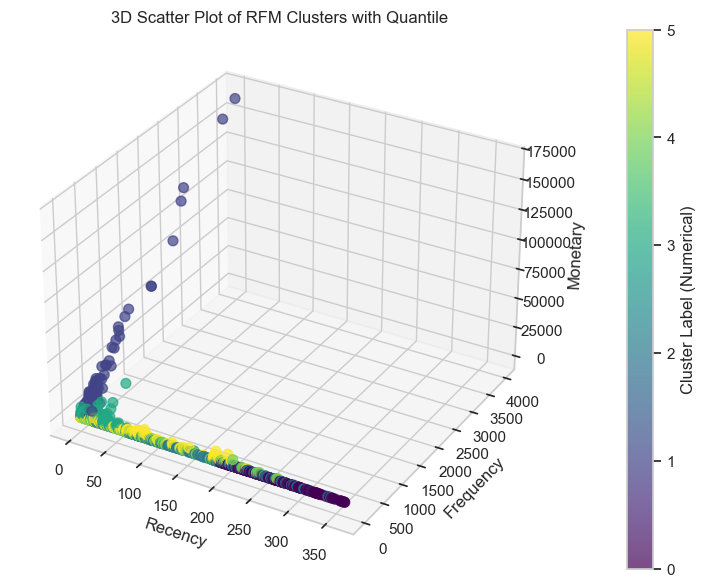

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting
import pandas as pd

# Convert Customer_Segment to categorical codes for color mapping
rfm_df['Segment_Code'] = pd.Categorical(rfm_df['Customer_Segment']).codes

# 3D Scatter plot of RFM values for all points with cluster as color
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with RFM data, colored by cluster
scatter = ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Monetary'], 
                     c=rfm_df['Segment_Code'], cmap='viridis', s=50, alpha=0.7)

# Labels and title
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
ax.set_title("3D Scatter Plot of RFM Clusters with Quantile")

# Adding color bar for cluster labels
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("Cluster Label (Numerical)")

plt.show()

## RFM Segmentation Clusters with Kmeans
K-means clustering is a popular technique for RFM segmentation as it allows for the grouping of customers based on similar distances in behavioral patterns. By calculating the distance between customers in the RFM space, K-means clustering identifies groups with similar purchase recency, frequency, and monetary value.

### Mechanism

1. **Standardize RFM Values**:
   - Before applying K-means, it’s essential to standardize the RFM data so that each dimension (Recency, Frequency, and Monetary) has equal influence on the clustering. This ensures that the clustering results are not skewed by differences in the scale of each component.

2. **Define the Number of Clusters (K)**:
   - Choosing the optimal number of clusters (K) is critical. We will use **Elbow Method** to determine the best K by analyzing how well-separated and cohesive each cluster is.

3. **Calculate Distances**:
   - K-means calculates the **Euclidean distance** between each customer’s RFM values and the centroid of each cluster. Customers are then grouped based on the minimum distance to each cluster center, ensuring that each cluster has a high degree of similarity in RFM behavior.

4. **Assign Cluster Labels and Interpret Results**:
   - After clustering, each customer is assigned to a cluster. These clusters are analyzed to understand the dominant characteristics of each group, such as high recency with low frequency or high monetary value, which can then be used to guide marketing strategies.

### Cluster Naming and Analysis

Each cluster is named based on the dominant characteristics of the customers within it, allowing for targeted marketing approaches:

1. **Cluster 3: Champions**
   - **Characteristics**:
     - **Very Low Recency**: Champions make frequent, recent purchases, indicating the highest level of engagement.
     - **High Frequency and Very High Monetary Value**: They purchase frequently and contribute significantly to revenue.
   - **Interpretation**: Champions are Shopee's most valuable and loyal customers – brand advocates who frequently make high-value purchases.

2. **Cluster 2: Loyal Customers**
   - **Characteristics**:
     - **Low Recency**: These customers have purchased recently, showing strong engagement.
     - **High Frequency and High Monetary Value**: They engage consistently and contribute significantly to revenue.
   - **Interpretation**: Loyal Customers are highly valuable, frequently purchasing and showing brand loyalty.

3. **Clusters 5 and 6: Promising**
   - **Characteristics**:
     - **Low Recency**: Customers in these clusters have engaged recently.
     - **Moderate Frequency and Moderate to High Monetary Value**: They purchase at a moderate rate and show promising spending patterns.
   - **Interpretation**: Promising customers have potential to become more loyal if nurtured with the right incentives.

4. **Cluster 1: At-Risk Customers**
   - **Characteristics**:
     - **Moderate to High Recency**: These customers have not purchased recently, but they were previously active.
     - **Moderate Frequency and Monetary Value**: They used to purchase more actively but have recently decreased their engagement.
   - **Interpretation**: At-Risk Customers are slipping away. They were once engaged but are now less active, making them a priority for re-engagement efforts.

5. **Cluster 4: Need Attention**
   - **Characteristics**:
     - **Moderate Recency**: These customers have purchased relatively recently, but not frequently.
     - **Low Frequency and Low to Moderate Monetary Value**: They purchase infrequently and spend a moderate amount.
   - **Interpretation**: This group shows some engagement but lacks consistency in purchasing frequency or spending.

6. **Cluster 0: Hibernating**
   - **Characteristics**:
     - **High Recency**: These customers have not engaged in a long time.
     - **Low Frequency and Low Monetary Value**: They purchase infrequently and have low total spending.
   - **Interpretation**: Hibernating customers are essentially inactive, showing little to no recent engagement.

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

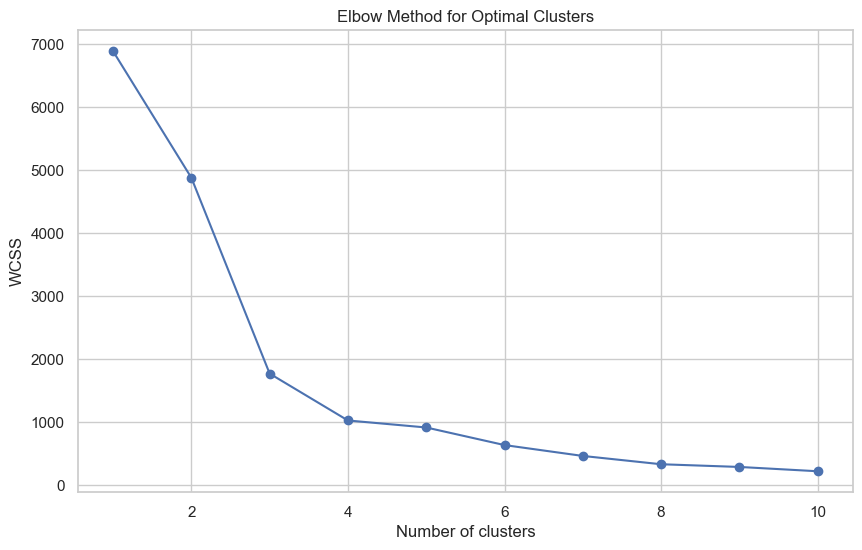

In [46]:
# Select RFM columns and scale them
rfm_data = rfm_df[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# Elbow method to find optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [47]:
# Fit K-means with the selected number of clusters
optimal_clusters = 7  # Adjust this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm_df['RFM_Kmeans_Clusters'] = kmeans.fit_predict(rfm_scaled)


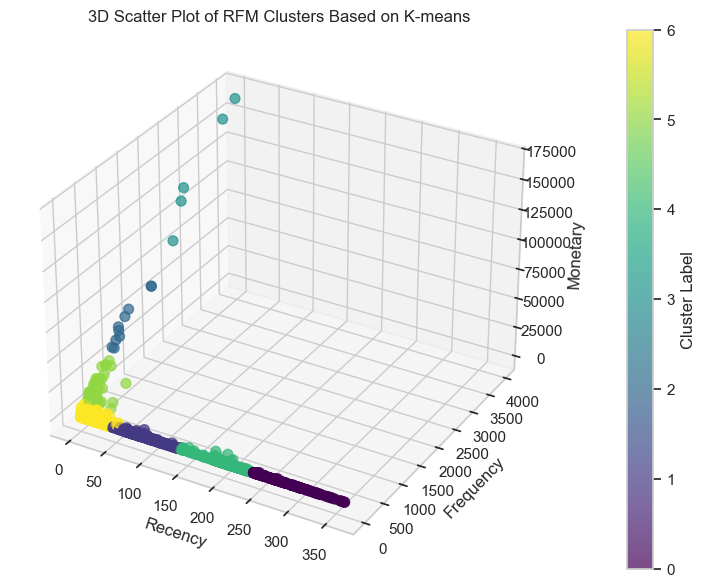

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

# 3D Scatter plot of RFM values for all points with cluster as color
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


rfm_scaled = pd.DataFrame(rfm_scaled)

# Scatter plot with RFM data, colored by cluster
scatter = ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Monetary'], 
                     c=rfm_df['RFM_Kmeans_Clusters'], cmap='viridis', s=50, alpha=0.7)

# Labels and title
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
ax.set_title("3D Scatter Plot of RFM Clusters Based on K-means")

# Adding color bar for cluster labels
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)  # Specify fig here, not plt
cbar.set_label("Cluster Label")

plt.show()

In [49]:
# Define the mapping for each cluster label
cluster_mapping = {
    3: "Champions",
    2: "Loyal Customers",
    5: "Promissing",
    6: "Promissing",
    1: "At-Risk Customers",
    4: "Need Attention",
    0: "Hibernating"
}

# Assuming rfm_df already contains the RFM_Kmeans_Clusters column
# Map the cluster names based on the cluster numbers
rfm_df['Kmeans_Cluster_Name'] = rfm_df['RFM_Kmeans_Clusters'].map(cluster_mapping)

In [50]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the clustering
silhouette_avg = silhouette_score(rfm_scaled, rfm_df['RFM_Kmeans_Clusters'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5623795083466795


### Comparison of RFM Segmentation with Quantiles vs. K-Means

#### 1. **Quantile-Based RFM Segmentation**
   - **Strengths**:
      - **Simplicity**: Quantile-based segmentation is straightforward and easy to understand. It divides customers into groups based on predefined percentile cut-offs, making it intuitive for stakeholders.
      - **Consistency**: Since quantiles use static thresholds, the segmentation is stable and doesn’t change with small variations in data. This can be useful for quick, periodic updates (e.g., monthly) without recalculating clusters.
      - **Fast Processing**: Quantile segmentation is computationally faster and better suited for large datasets that need frequent updates. This can be advantageous in real-time environments or when data is refreshed regularly.
   - **Weaknesses**:
      - **Less Structural Precision**: The quantile method may create segments that don’t fully capture natural groupings in the data. This could lead to clusters with overlapping characteristics or less-defined boundaries.
      - **Limited Adaptability**: Quantile segmentation assumes an equal number of customers in each segment, which may not accurately reflect behavioral patterns. It may overlook specific, smaller customer groups that are highly valuable.

#### 2. **K-Means Clustering for RFM Segmentation**
   - **Strengths**:
      - **Data-Driven Grouping**: K-means clustering uses distance-based calculations, creating clusters that represent true groupings in the data. This results in more structured, visually distinct clusters (as seen in the 3D plot).
      - **Flexibility**: K-means can adapt to the underlying structure of customer behavior, allowing for clusters of different sizes. This flexibility allows Shopee to identify niche segments that quantile-based segmentation may overlook.
      - **Scalability**: K-means can capture more granular customer segments, especially as data grows. For complex customer behavior, K-means provides a refined clustering that enhances segmentation accuracy.
   - **Weaknesses**:
      - **Complexity**: K-means requires additional steps, including standardization of data and selection of the optimal number of clusters (K). This adds complexity to the analysis and may be less intuitive for stakeholders.
      - **Computational Demand**: K-means can be computationally intensive, particularly for large datasets with frequent updates. It may be less suitable for real-time updates and may require periodic re-clustering to keep segments relevant.
      - **Sensitivity to Outliers**: K-means can be affected by outliers, as these can distort the cluster centroids and affect the overall clustering result. Additional preprocessing may be required to handle outliers.

### Summary Table

| Method               | Strengths                                                                                   | Weaknesses                                                                                         |
|----------------------|---------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------|
| **Quantile-Based**   | Simple, consistent, fast for large datasets; easy to interpret and update frequently.       | Less structural precision, limited adaptability, may not capture natural groupings in customer data.|
| **K-Means Clustering** | Data-driven clusters, flexible structure, scalable with granularity in segmentation.      | Complex, computationally intensive, sensitive to outliers; may require periodic re-clustering.      |

<br>


Ultimately, the choice between these methods depends on Shopee’s priorities and what stakeholders need from customer segmentation:
- If stakeholders **prioritize fast, routine updates and simplicity**, quantile-based segmentation may be more appealing.
- If stakeholders are looking for **precise and data-driven insights that can guide long-term strategies**, K-means clustering may be the preferred choice.

<br>
For now, we will present both options to stakeholders, along with the pros and cons of each approach. This will allow them to make an informed decision on which segmentation method (or combination of both) best aligns with Shopee’s business objectives and strategic needs.

## 3. Activity Status

This code assigns an **activity status** to each customer based on their most recent purchase date in relation to a specified cutoff date. By categorizing customers as "Active" or "Inactive," Shopee can better understand customer engagement levels, which is critical for targeted re-engagement strategies.

- **Activity Criteria**: Customers are considered "Active" if they have made a purchase within the last 60 days relative to the cutoff date. If their most recent purchase was more than 60 days before the cutoff date, or if they have no purchase history, they are categorized as "Inactive."

- **Rationale for 60-Day Cutoff**:
   - **Simplicity and Prompt Response**: Setting a 60-day cutoff is straightforward, making it easy to identify and act on customers who are at risk of disengagement. This period allows Shopee to respond promptly with targeted re-engagement campaigns before customers drift further toward inactivity.
   - **Alignment with E-commerce Engagement Patterns**: In many e-commerce settings, engaged customers typically make purchases every few weeks to a couple of months. A 60-day window captures customers who are still within a typical engagement cycle, ensuring that those marked as "Inactive" are genuinely in need of re-engagement.
   - **Optimal Marketing Balance**: A 60-day period provides enough time for natural re-engagement without requiring overly frequent interventions. This balance allows marketing efforts to focus on customers who may need an incentive to return, optimizing the use of resources for maximum impact.
   - **Broad Applicability Across Categories**: This cutoff is effective across diverse product categories. Whether customers are purchasing frequently bought items (e.g., groceries) or less frequent, higher-value items (e.g., electronics), the 60-day threshold is broadly applicable, making the "Inactive" status relevant for different types of customers.

- **Cutoff Date**: The cutoff date serves as a reference point for determining recency. In this example, it is set to December 31, 2019, but it can be adjusted based on business needs, such as the end of a promotional period or fiscal quarter.

- **Use Case**: The "Activity" status allows Shopee to effectively segment customers based on engagement, guiding targeted re-engagement campaigns for "Inactive" customers and proactive engagement strategies for "Active" customers.

   - **Active Customers** are ideal targets for regular engagement and upsell strategies, reinforcing their relationship with Shopee.
   - **Inactive Customers** can benefit from tailored re-engagement efforts, such as win-back offers, reminders, or special promotions. By focusing on reactivating these customers, Shopee can reduce churn and maintain customer loyalty.

In [51]:
# Function to assign activity status based on a specific date
def is_active(row, cutoff_date):
    customer_id = row['customer_id']
    
    # Filter orders for the specific customer and check the last order date before the cutoff date
    customer_orders = orders[orders['customer_id'] == customer_id]
    customer_orders['order_date'] = pd.to_datetime(customer_orders['order_time']).dt.date
    
    # Find the last order date before the cutoff date
    last_order = customer_orders[customer_orders['order_date'] < cutoff_date]['order_date'].max()
    
    if pd.notna(last_order):  # Check if there is a last order date
        days_since_last_order = (cutoff_date - last_order).days
        if days_since_last_order <= 60:
            return 'Active'
        else:
            return 'Inactive'
    else:
        return 'Inactive'  # No orders found, consider inactive

# Define a specific cutoff date for activity checking
cutoff_date = datetime(2019, 12, 31).date()  # Change this date as needed

# Apply the function to create the 'Activity' column
customer_clusters['Activity'] = customer_clusters.apply(is_active, axis=1, cutoff_date=cutoff_date)

## 4. Discount Sensitivity

Discount sensitivity is an important behavioral metric that reveals how likely customers are to make purchases when discounts are offered. By examining **Average Discount Percentage** (the typical discount percentage a customer receives on their purchases) and **Percentage of Items Purchased at a Discount** (the proportion of total purchases made with a discount), we can understand which customers are most responsive to promotions.

Using **K-means clustering**, customers are grouped into distinct **Discount Sensitivity Clusters** based on their discount behavior patterns. Here’s an analysis of each cluster:

### Cluster Analysis and Naming

1. **Cluster 0: Bargain Hunters**
   - **Characteristics**:
     - **High Percentage of Items Purchased at Discount** (70-100%): These customers primarily buy discounted items, indicating a high level of price sensitivity.
     - **High Average Discount Percentage**: They typically purchase items with substantial discounts, preferring significant price reductions.
   - **Interpretation**: Bargain Hunters are highly discount-sensitive and wait for sales before purchasing.
   - **Actionable Insights**:
     - **Targeted Discounts**: Use deep discount campaigns to attract them, such as seasonal sales or flash deals.
     - **Personalized Promotions**: Offer exclusive discount codes or promotions to keep them engaged.

2. **Cluster 3: Deal Seekers**
   - **Characteristics**:
     - **Moderate to High Percentage of Items Purchased at Discount** (50-70%): These customers buy many discounted items but are not as dependent on discounts as Bargain Hunters.
     - **Moderate Average Discount Percentage**: They typically purchase items with modest discounts.
   - **Interpretation**: Deal Seekers enjoy discounts but may still buy at regular prices if the value proposition is strong.
   - **Actionable Insights**:
     - **Loyalty Program Discounts**: Encourage loyalty by offering modest, consistent discounts rather than only deep discounts.
     - **Bundle Discounts**: Offer small discounts for bundle purchases, encouraging more frequent purchases.

3. **Cluster 1: Occasional Discounters**
   - **Characteristics**:
     - **Low to Moderate Percentage of Items Purchased at Discount** (20-50%): These customers occasionally take advantage of discounts but do not rely on them.
     - **Low to Moderate Average Discount Percentage**: They receive discounts occasionally but do not prioritize them in their purchasing decisions.
   - **Interpretation**: Occasional Discounters are less price-sensitive and may respond more to product quality or brand value rather than discounts.
   - **Actionable Insights**:
     - **Value-Based Messaging**: Highlight product quality, exclusivity, or other non-price-related value propositions to attract these customers.
     - **Limited Discounts on Premium Items**: Occasionally offer discounts on premium items to entice them without conditioning them to expect regular discounts.

4. **Cluster 2: Full-Price Shoppers**
   - **Characteristics**:
     - **Very Low Percentage of Items Purchased at Discount** (<20%): These customers rarely buy discounted items, showing minimal discount sensitivity.
     - **Very Low Average Discount Percentage**: They pay close to full price on most purchases, indicating a focus on non-price factors.
   - **Interpretation**: Full-Price Shoppers value the product or brand more than discounts and may prioritize quality, convenience, or brand loyalty.
   - **Actionable Insights**:
     - **Exclusive and Premium Offerings**: Focus on exclusive products or premium services that align with their value orientation.
     - **VIP Programs**: Offer membership-based benefits rather than discount-based incentives to reinforce loyalty without discount dependency.

In [52]:
# Define the features for discount sensitivity clustering
data = customer_metrics.copy()
features = ['percentage_item_discounted', 'average_discount_percentage']
scaler = StandardScaler()

data = data[['customer_id'] + features]

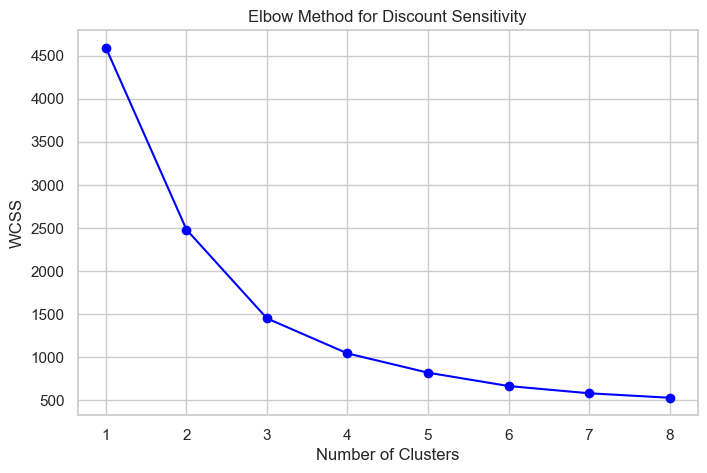

In [53]:
# Standardize the selected features within this RFM cluster
data_scaled = scaler.fit_transform(data[features])

# Calculate WCSS for a range of cluster numbers
wcss = []
max_clusters = 8  # You can adjust this range based on your needs
for n in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS for this RFM cluster
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', color='blue')
plt.title(f'Elbow Method for Discount Sensitivity')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


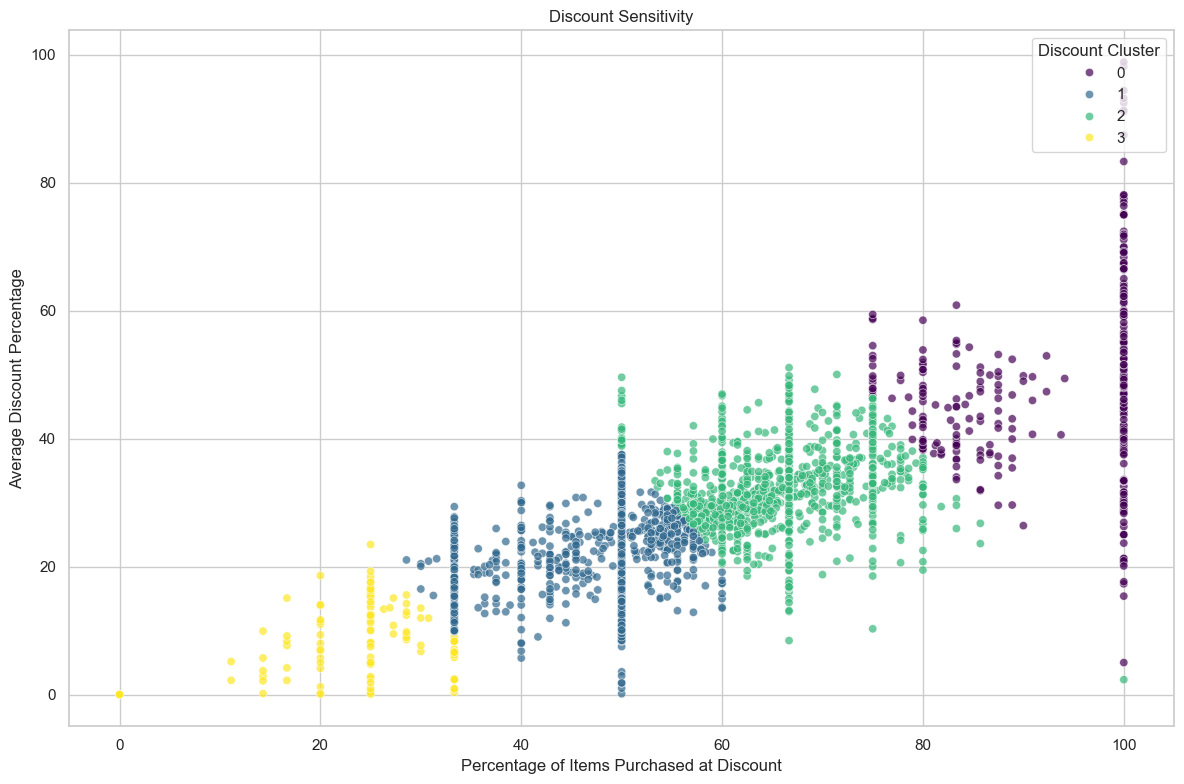

In [54]:
# Fit K-means with the selected number of clusters
optimal_clusters = 4  # Adjust this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Discount_Sensitivity'] = kmeans.fit_predict(data[features])

# Visualize discount sensitivity clusters within each RFM segment
plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='percentage_item_discounted',
    y='average_discount_percentage',
    hue='Discount_Sensitivity',
    data=data,
    palette='viridis',
    alpha=0.7
)
plt.title(f'Discount Sensitivity')
plt.xlabel('Percentage of Items Purchased at Discount')
plt.ylabel('Average Discount Percentage')
plt.legend(title='Discount Cluster', loc='upper right')

plt.tight_layout()
plt.show()

In [55]:
# Define the mapping for each discount cluster label
discount_cluster_mapping = {
    0: "Bargain Hunter",
    1: "Occasional Discounter",
    2: "Full Price Shopper",
    3: "Deal Seeker"
}

# Assuming your DataFrame is named `df` and contains a column 'Discount Cluster'
# Map the cluster names based on the cluster numbers
data['Discount_Cluster'] = data['Discount_Sensitivity'].map(discount_cluster_mapping)

customer_clusters = pd.merge(customer_clusters, data[['customer_id', 'Discount_Cluster']], how ='left', on='customer_id')

## 5. Preference on Timing and Category

A. **Preferred Day of the Week**
   - **Description**: Identifies the day of the week on which a customer most frequently makes purchases.
   - **Purpose**: Enables Shopee to schedule targeted promotions and campaigns on days when customers are more likely to shop, increasing the likelihood of engagement and conversions.

B. **Preferred Day of the Week**
   - **Description**: Identifies the hours of the day on which a customer most frequently makes purchases.
   - **Purpose**: Enables Shopee to schedule targeted promotions and campaigns on hours when customers are more likely to shop, increasing the likelihood of engagement and conversions.

C. **Preferred Category**
   - **Description**: Highlights the product category that a customer purchases most frequently.
   - **Purpose**: Facilitates personalized marketing and product recommendations by focusing on the customer’s primary area of interest, enhancing relevance and increasing customer satisfaction.

In [56]:
### PREFERRED DAY OF THE WEEK SEGMENT ###
# Extract the day of the week from order_time
orders['day_of_week'] = orders['order_time'].dt.day_name()
# Calculate the most frequent day of purchase per customer
preferred_day = orders.groupby(['customer_id', 'day_of_week']).size().reset_index(name='day_count')
preferred_day = preferred_day.loc[preferred_day.groupby('customer_id')['day_count'].idxmax()]
preferred_day = preferred_day[['customer_id', 'day_of_week']].rename(columns={'day_of_week': 'preferred_day'})

### PREFERRED DAY OF THE WEEK SEGMENT ###
# Extract the day of the week from order_time
orders['hours_of_the_day'] = orders['order_time'].dt.hour
# Calculate the most frequent day of purchase per customer
preferred_hour = orders.groupby(['customer_id', 'hours_of_the_day']).size().reset_index(name='hours_count')
preferred_hour = preferred_hour.loc[preferred_hour.groupby('customer_id')['hours_count'].idxmax()]
preferred_hour = preferred_hour[['customer_id', 'hours_of_the_day']].rename(columns={'hours_of_the_day': 'preferred_hour'})


### PREFERRED CATEGORY SEGMENT ###
# Merge orders with products to get category details in each order
orders_products = orders[['customer_id','product_id', 'main_category']]
# Calculate the most frequently purchased category per customer
preferred_category = orders_products.groupby(['customer_id', 'main_category']).size().reset_index(name='category_count')
# Find the category with the highest count for each customer
preferred_category = preferred_category.loc[preferred_category.groupby('customer_id')['category_count'].idxmax()]
preferred_category = preferred_category[['customer_id', 'main_category']].rename(columns={'main_category': 'preferred_category'})

customer_clusters = pd.merge(customer_clusters, preferred_day, how='left', on='customer_id')
customer_clusters = pd.merge(customer_clusters, preferred_hour, how='left', on='customer_id')
customer_clusters = pd.merge(customer_clusters, preferred_category, how='left', on='customer_id')

## 6. Campaign Participation
Campaign Participation measures the extent to which each customer engages in Shopee’s promotional campaigns, distinguishing between **High Participation** and **Low Participation**. This metric is based on the customer’s frequency of purchases during campaign periods in relation to the total number of campaigns available within a given timeframe.

**Purpose**:
<br>
Identifying campaign participation helps Shopee to:
   - **Optimize Targeting**: Understand which customers are responsive to campaign-driven promotions and can be targeted for future campaigns.
   - **Allocate Marketing Resources**: Allocate marketing budgets effectively by focusing more resources on customers with a high likelihood of participating in campaigns.


**Participation Score**:
   - **High Participation**: If the ratio of campaign participation (campaign orders relative to the total campaign count) is above 40%, the customer is categorized as having "High Participation."
   - **Low Participation**: If the ratio is below or equal to 40%, the customer is categorized as having "Low Participation."

In [57]:
import pandas as pd
from datetime import datetime

# Assuming more_special_dates and less_special_dates are lists of datetime objects
campaign_dates = more_special_dates + less_special_dates

# Function to assign activity status based on a specific date
def campaign_hunter(row, cutoff_date):
    customer_id = row['customer_id']

    # Count the total number of campaigns by checking if any dates are before the cutoff
    campaign_count = sum(date.date() <= cutoff_date for date in campaign_dates)
    
    # Filter orders for the specific customer
    customer_orders = orders[orders['customer_id'] == customer_id].copy()
    customer_orders['order_date'] = pd.to_datetime(customer_orders['order_time']).dt.date
    
    # Find unique campaign orders before the cutoff date
    campaign_customer = customer_orders[(customer_orders['order_date'] < cutoff_date) & 
                                        (customer_orders['is_campaign'] == True)]['order_date'].nunique()

    # Determine participation Score
    if campaign_count > 0:  # Check if there are campaign dates
        if campaign_customer / campaign_count <= 0.40:  # Adjusted to use 0.40 for a more typical percentage
            return 'Low Participation'
        else:
            return 'High Participation'
    else:
        return 'Low Participation'  # No campaigns found, consider inactive

# Define a specific cutoff date for activity checking
cutoff_date = datetime(2019, 12, 31).date()  # Change this date as needed

# Apply the function to create the 'Campaign' column
customer_clusters['Campaign'] = customer_clusters.apply(campaign_hunter, axis=1, cutoff_date=cutoff_date)


In [58]:
customer_clusters.head(5)

,customer_id,loyalty_tier_customer_facing,percentile_rank,Activity,Discount_Cluster,preferred_day,preferred_hour,preferred_category,Campaign
0,299,Gold,84.183007,Active,Full Price Shopper,Saturday,8.0,Men Clothes,Low Participation
1,2143,Platinum,91.416122,Active,Full Price Shopper,Saturday,7.0,Health & Beauty,High Participation
2,2306,Platinum,96.514161,Active,Full Price Shopper,Sunday,9.0,Men Clothes,High Participation
3,3334,Classic,41.612200,Active,Occasional Discounter,Saturday,20.0,Women Clothes,Low Participation
4,5751,Platinum,91.154684,Active,Full Price Shopper,Sunday,7.0,Health & Beauty,High Participation


In [59]:
rfm_df.head(5)

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Customer_Segment,Segment_Code,RFM_Kmeans_Clusters,Kmeans_Cluster_Name
0,299,9,30.649698,1875.743280,4,4,4,12,champion,1,6,Promissing
1,305,78,11.419612,583.837547,2,3,3,8,promising,5,1,At-Risk Customers
2,346,0,48.579080,1088.592489,4,4,4,12,champion,1,6,Promissing
3,462,0,251.637737,7841.985920,4,4,4,12,champion,1,5,Promissing
4,634,7,8.760746,149.328076,4,2,2,8,promising,5,6,Promissing


## How to Use the Clusters

This guide outlines several actionable methods for Shopee’s marketing team to leverage customer clustering for targeted and effective campaigns. By selecting and filtering clusters, stakeholders can create tailored strategies that align with specific objectives and engagement levels. The flexibility of this clustering system allows stakeholders to dynamically adjust criteria, ensuring that campaigns remain relevant for both short-term promotional events and long-term engagement goals. Below are some potential scenarios where this clustering system could be effectively applied:

#### 1. **Preparing for High-Impact Campaigns (e.g., Double Date Sales)**

- **Goal**: Maximize reach and engagement in the lead-up to major sales events.
- **Suggested Cluster Filter**:
   - **Active Customers** with **Low Campaign Participation**: Identify active users who have historically shown low engagement in campaigns. This group can be targeted with intensive marketing to build familiarity with the upcoming campaign.
   - **Channels**: Use a mix of in-app notifications, targeted ads on other platforms, and email reminders to repeatedly engage segment in the week before the sale.
   - **Personalized Incentives**: Offer exclusive “early bird” discounts or reminders of special deals to encourage early participation.

#### 2. **Focusing on VIP and Loyal Customers for Exclusive Deals**

- **Goal**: Reward high-value customers with early access to premium deals, fostering loyalty and brand advocacy.
- **Suggested Cluster Filter**:
   - **VIP and Loyal Customers (e.g., Platinum or Gold tiers)** who prefer **discounts** (as identified by high Discount Sensitivity).
   - **Campaign Design**: Provide early access to limited-time deals, premium items, or exclusive bundles. These customers appreciate being first to know, so give them a VIP experience with special privileges.
   - **Channels**: Direct communication, such as SMS or email, to emphasize exclusivity and personal appreciation. Push notifications with personalized offers can also increase engagement.

#### 3. **Re-engaging Inactive Customers**

- **Goal**: Win back customers who haven’t purchased recently.
- **Suggested Cluster Filter**:
   - **Inactive Customers** with **Moderate to High Campaign Participation**: These customers have engaged in campaigns previously but have recently become inactive. Use re-engagement offers to rekindle interest.
   - **Campaign Design**: Offer “We Miss You” deals, personalized recommendations based on past purchases, and win-back incentives like one-time discount codes.
   - **Channels**: Email or SMS campaigns are effective for lapsed users, with follow-up reminders if engagement is not immediate.

#### 4. **Engaging Discount-Sensitive Customers with Flash Sales**

- **Goal**: Drive immediate purchases by appealing to price-conscious customers.
- **Suggested Cluster Filter**:
   - **Bargain Hunters** or **Deal Seekers** within **Active or Recently Active Customers** segments. These customers respond well to discounts and may be more likely to participate in time-sensitive promotions.
   - **Campaign Design**: Flash sales, limited-time discounts, or bundle deals that create urgency.
   - **Channels**: Real-time push notifications, in-app banners, and website highlights to capture attention immediately.

#### 5. **Promoting New Product Categories to Specific Category Shopper**

- **Goal**: Encourage purchases and introduce new products to engaged customers.
- **Suggested Cluster Filter**:
   - **Shoppers with related preferred category** who are **Active**: These customers frequently order from this category and are likely to be open to new product types.
   - **Campaign Design**: Cross-category promotions, “complete your collection” bundles, or “you might also like” recommendations.
   - **Channels**: Personalized in-app suggestions, email recommendations, and dynamic homepage banners showcasing new or trending products.

#### 6. **Testing Loyalty Program Impact on Frequent Buyers with Low Monetary Value**

- **Goal**: Encourage frequent, small-spending customers to increase their average order value.
- **Suggested Cluster Filter**:
   - **Frequent Buyers** with **Low Monetary Value and High Discount Sensitivity**: This group may benefit from loyalty incentives that encourage higher-value purchases.
   - **Campaign Design**: Offer loyalty points or tier-based rewards for spending milestones, encouraging them to increase spending.
   - **Channels**: Regular updates on loyalty status through in-app messages, personalized rewards reminders, and email notifications highlighting the benefits of moving up the loyalty tiers.

#### 7. **Leveraging Campaign Participation to Refine Strategy**

- **Goal**: Identify engagement trends to improve future campaigns.
- **Suggested Cluster Filter**:
   - **Analyze Campaign Participation Rates Across Segments**: Use data on campaign participation to refine messaging and timing for future campaigns.
   - **Action Steps**:
      - High participation clusters can be encouraged to share their experiences, potentially acting as advocates.
      - Low participation clusters can be re-targeted with more attractive offers or reminders, especially during major shopping events.
   - **Insights**: Campaign participation data helps in understanding which segments respond best to certain types of campaigns, allowing for more effective resource allocation in the future.


This clustering system allows Shopee’s marketing team to filter and target customer segments in a flexible, data-driven way. By selecting the right combinations of **activity status, loyalty tiers, discount sensitivity, preferred timing, and campaign participation**, stakeholders can optimize outreach for each unique campaign, maximizing both customer engagement and overall sales impact. 


### Combining Customer-Facing and Company-Facing Segmentation for Impact
By implementing both customer-facing and company-facing segmentation, Shopee is hoped to be benefited from a **holistic approach** that aligns customer experience with operational efficiency:

- **Customer-Facing**: The loyalty tiers (Classic, Silver, Gold, Platinum) provide a clear framework for customers to engage competitively, work towards higher ranks, and enjoy exclusive benefits based on their spending rank. This tiered approach strengthens brand loyalty and encourages increased spending.
  
- **Company-Facing**: Behind the scenes, more granular segmentation using RFM analysis, discount sensitivity, product variety, and other behavioral factors allows Shopee to target each customer group effectively. This segmentation provides a foundation for personalized marketing, optimized promotions, and improved customer service.

### Stakeholders Involved
To implement this segmentation strategy successfully, cross-functional collaboration is crucial:

1. **Marketing Team**:
   - Develop and implement customer-facing loyalty tier benefits and messaging.
   - Design targeted campaigns based on internal segmentation insights (discount sensitivity, product variety, preferred shopping windows).

2. **Data Analytics Team**:
   - Conduct RFM and behavioral segmentation analysis, updating segment definitions based on changing customer behavior.
   - Monitor the effectiveness of segmentation-driven campaigns and loyalty tiers, adjusting the criteria as necessary.

3. **CRM and Customer Engagement Team**:
   - Manage loyalty communications for different tiers, sending personalized messages and re-engagement campaigns.
   - Track and analyze customer responses to loyalty incentives and adjust communications accordingly.

4. **Product and UX/UI Teams**:
   - Ensure that the customer-facing experience reflects the loyalty tiers and segmented experiences.
   - Implement features for seamless access to loyalty benefits and personalized recommendations for each customer segment.

5. **Finance Team**:
   - Review and approve budget allocations for customer incentives and campaign investments, ensuring they align with projected ROI from targeted segments.
   - Analyze the financial impact of segmentation-based discounts and loyalty benefits on overall profitability.


This two-way segmentation approach is hoped to create a **customer-centric experience** through loyalty tiers while gaining **actionable insights for internal decision-making** through detailed behavioral segmentation. By clearly defining loyalty tiers for customers and using RFM analysis, discount sensitivity, product variety, and other dimensions internally, Shopee is expected to improve customer satisfaction, engagement, and retention.

This segmentation strategy aligns well with Shopee’s business goals, allowing the platform to:

- **Engage** customers with transparent loyalty benefits that reward frequent engagement.
- **Personalize** experiences and offers based on precise behavioral insights.
- **Optimize resources** by focusing efforts on high-potential segments and tailoring approaches for lower-engagement groups.

This combined approach is hoped to make customer interactions are meaningful, campaigns are effective, and business outcomes are maximized.